## Data Portfolio Part 1

### Project Summary: Analysis of Higher Education Statistics Agency (HESA) Income Data

This project investigates income trends for a group of similar universities over a five-year period. The analysis utilizes HESA income data, focusing on both the total income and its composition.

* **Income Distribution:** The project explores the breakdown of income for these universities, highlighting the percentage of income derived from various sources relative to the total income.
* **Income Source Relationships:** Correlation plots are used to examine the relationships between different income sources, such as total income versus fee income percentage and total income versus research grant percentage. This analysis helps to identify potential dependencies or trends between funding sources.
* **Income Trends:** Line graphs illustrate how income from different sources (e.g., fees, government grants) has behaved over the five-year period, revealing potential changes or stability in funding patterns.

### Loading HESA Data

In [4]:
import pandas as pd
import numpy as np
from IPython.display import HTML
from pandas.io.formats.style import Styler
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [5]:
# Read HESA data files
df_2018 = pd.read_csv('data_2018.csv')
df_2019 = pd.read_csv('data_2019.csv')
df_2020 = pd.read_csv('data_2020.csv')
df_2021 = pd.read_csv('data_2021.csv')
df_2022 = pd.read_csv('data_2022.csv')
# All income values are in units of £000s

In [6]:
# Append DataFrames
combined_df = pd.concat([df_2018, df_2019, df_2020, df_2021, df_2022], ignore_index=True)

In [7]:
combined_df

,UKPRN,HE Provider,Financial Year End,Tuition fees and education contracts,Funding body grants,Total research grants and contracts,Total other income,Investment income,Total income before donations and endowments,Total donations and endowments,Total income
0,10007783.0,The University of Aberdeen,31/07/2018,"55,842","74,752","56,079","31,286","1,251","219,210",261,"219,471"
1,10007849.0,Abertay University,31/07/2018,"9,064","19,475","1,316","2,627",489,"32,971",587,"33,558"
2,10007856.0,Aberystwyth University,31/07/2018,"58,198","11,933","20,004","26,684",784,"117,603",446,"118,049"
3,10000163.0,AECC University College,31/07/2018,"7,399",567,51,"1,361",14,"9,392",28,"9,420"
4,10000291.0,Anglia Ruskin University,31/07/2018,"167,988","19,372","5,205","15,100",184,"207,849",88,"207,937"
...,...,...,...,...,...,...,...,...,...,...,...
1203,10023453.0,Matrix College of Counselling and Psychotherap...,31/08/2021,464,0,0,1,0,NaN,0,465
1204,10062833.0,Raindance Educational Services Limited,31/10/2021,446,0,0,0,0,NaN,0,446
1205,10083403.0,The Engineering and Design Institute London,31/07/2022,222,185,0,9,3,NaN,0,419
1206,10067601.0,JSA Education Group Ltd.,31/07/2022,165,0,0,61,0,NaN,0,226


### Data Wrangling

In [8]:
combined_df.dtypes

UKPRN                                           float64
HE Provider                                      object
Financial Year End                               object
Tuition fees and education contracts             object
Funding body grants                              object
Total research grants and contracts              object
Total other income                               object
Investment income                                object
Total income before donations and endowments     object
Total donations and endowments                   object
Total income                                     object
dtype: object

In [9]:
# Remove commas from numerical values

In [10]:
combined_df["Total income"] = combined_df["Total income"].str.replace(',', '')
combined_df["Tuition fees and education contracts"] = combined_df["Tuition fees and education contracts"].str.replace(',', '')
combined_df["Funding body grants"] = combined_df["Funding body grants"].str.replace(',', '')
combined_df["Total research grants and contracts"] = combined_df["Total research grants and contracts"].str.replace(',', '')
combined_df["Total other income"] = combined_df["Total other income"].str.replace(',', '')
combined_df["Investment income"] = combined_df["Investment income"].str.replace(',', '')
combined_df["Total income before donations and endowments"] = combined_df["Total income before donations and endowments"].str.replace(',', '')
combined_df["Total donations and endowments"] = combined_df["Total donations and endowments"].str.replace(',', '')

In [11]:
# Convert to numerical dtypes
combined_df['Total income'] = pd.to_numeric(combined_df['Total income'], errors='coerce')
combined_df['Tuition fees and education contracts'] = pd.to_numeric(combined_df['Tuition fees and education contracts'], errors='coerce')
combined_df['Funding body grants'] = pd.to_numeric(combined_df['Funding body grants'], errors='coerce')
combined_df['Total research grants and contracts'] = pd.to_numeric(combined_df['Total research grants and contracts'], errors='coerce')
combined_df['Total other income'] = pd.to_numeric(combined_df['Total other income'], errors='coerce')
combined_df['Investment income'] = pd.to_numeric(combined_df['Investment income'], errors='coerce')
combined_df['Total income before donations and endowments'] = pd.to_numeric(combined_df['Total income before donations and endowments'], errors='coerce')
combined_df['Total donations and endowments'] = pd.to_numeric(combined_df['Total donations and endowments'], errors='coerce')

In [12]:
combined_df.dtypes

UKPRN                                           float64
HE Provider                                      object
Financial Year End                               object
Tuition fees and education contracts              int64
Funding body grants                               int64
Total research grants and contracts               int64
Total other income                                int64
Investment income                                 int64
Total income before donations and endowments    float64
Total donations and endowments                    int64
Total income                                      int64
dtype: object

In [13]:
combined_df_copy=combined_df.copy() # Creating a copy of the dataframe

In [14]:
# Replacing NaN values with 0.0

numerical_cols = combined_df.select_dtypes(include=['int64', 'float64'])

print(numerical_cols)

           UKPRN  Tuition fees and education contracts  Funding body grants  \
0     10007783.0                                 55842                74752   
1     10007849.0                                  9064                19475   
2     10007856.0                                 58198                11933   
3     10000163.0                                  7399                  567   
4     10000291.0                                167988                19372   
...          ...                                   ...                  ...   
1203  10023453.0                                   464                    0   
1204  10062833.0                                   446                    0   
1205  10083403.0                                   222                  185   
1206  10067601.0                                   165                    0   
1207  10082828.0                                   202                    1   

      Total research grants and contracts  Total ot

In [15]:
combined_df.isnull().sum() # showing 0 values in numerical columns

UKPRN                                             5
HE Provider                                       0
Financial Year End                                5
Tuition fees and education contracts              0
Funding body grants                               0
Total research grants and contracts               0
Total other income                                0
Investment income                                 0
Total income before donations and endowments    914
Total donations and endowments                    0
Total income                                      0
dtype: int64

In [16]:
combined_df.drop(combined_df[combined_df['HE Provider'] == 'Total'].index, inplace=True) # Removing the TOTAL Rows (representing the Total for Each Year)

In [17]:
combined_df

,UKPRN,HE Provider,Financial Year End,Tuition fees and education contracts,Funding body grants,Total research grants and contracts,Total other income,Investment income,Total income before donations and endowments,Total donations and endowments,Total income
0,10007783.0,The University of Aberdeen,31/07/2018,55842,74752,56079,31286,1251,219210.0,261,219471
1,10007849.0,Abertay University,31/07/2018,9064,19475,1316,2627,489,32971.0,587,33558
2,10007856.0,Aberystwyth University,31/07/2018,58198,11933,20004,26684,784,117603.0,446,118049
3,10000163.0,AECC University College,31/07/2018,7399,567,51,1361,14,9392.0,28,9420
4,10000291.0,Anglia Ruskin University,31/07/2018,167988,19372,5205,15100,184,207849.0,88,207937
...,...,...,...,...,...,...,...,...,...,...,...
1203,10023453.0,Matrix College of Counselling and Psychotherap...,31/08/2021,464,0,0,1,0,NaN,0,465
1204,10062833.0,Raindance Educational Services Limited,31/10/2021,446,0,0,0,0,NaN,0,446
1205,10083403.0,The Engineering and Design Institute London,31/07/2022,222,185,0,9,3,NaN,0,419
1206,10067601.0,JSA Education Group Ltd.,31/07/2022,165,0,0,61,0,NaN,0,226


In [18]:
combined_df.isnull().sum()

UKPRN                                             0
HE Provider                                       0
Financial Year End                                0
Tuition fees and education contracts              0
Funding body grants                               0
Total research grants and contracts               0
Total other income                                0
Investment income                                 0
Total income before donations and endowments    914
Total donations and endowments                    0
Total income                                      0
dtype: int64

In [19]:
combined_df = combined_df.fillna(0) # Replacing NaN values with 0.0

combined_df.isnull().sum() # Check for NaN values

UKPRN                                           0
HE Provider                                     0
Financial Year End                              0
Tuition fees and education contracts            0
Funding body grants                             0
Total research grants and contracts             0
Total other income                              0
Investment income                               0
Total income before donations and endowments    0
Total donations and endowments                  0
Total income                                    0
dtype: int64

In [20]:
combined_df

,UKPRN,HE Provider,Financial Year End,Tuition fees and education contracts,Funding body grants,Total research grants and contracts,Total other income,Investment income,Total income before donations and endowments,Total donations and endowments,Total income
0,10007783.0,The University of Aberdeen,31/07/2018,55842,74752,56079,31286,1251,219210.0,261,219471
1,10007849.0,Abertay University,31/07/2018,9064,19475,1316,2627,489,32971.0,587,33558
2,10007856.0,Aberystwyth University,31/07/2018,58198,11933,20004,26684,784,117603.0,446,118049
3,10000163.0,AECC University College,31/07/2018,7399,567,51,1361,14,9392.0,28,9420
4,10000291.0,Anglia Ruskin University,31/07/2018,167988,19372,5205,15100,184,207849.0,88,207937
...,...,...,...,...,...,...,...,...,...,...,...
1203,10023453.0,Matrix College of Counselling and Psychotherap...,31/08/2021,464,0,0,1,0,0.0,0,465
1204,10062833.0,Raindance Educational Services Limited,31/10/2021,446,0,0,0,0,0.0,0,446
1205,10083403.0,The Engineering and Design Institute London,31/07/2022,222,185,0,9,3,0.0,0,419
1206,10067601.0,JSA Education Group Ltd.,31/07/2022,165,0,0,61,0,0.0,0,226


#### Filtering the DataFrame by relevant Universities (Comparable Universities: Russel Group, Research Intensives)

In [21]:
relevant_universities = [
    "The University of Lancaster", 
"Cardiff University", 
"University of Durham",
"Imperial College of Science, Technology and Medicine",
"King's College London",
"London School of Economics and Political Science",
"Loughborough University",
"Newcastle University",
"Queen Mary University of London",
"Queen's University Belfast",
"University College London",
"The University of Aberdeen",
"The University of Bath",
"The University of Birmingham",
"The University of Bristol",
"The University of East Anglia",
"The University of Edinburgh",
"The University of Essex",
"The University of Exeter",
"The University of Glasgow",
"The University of Leeds",
"The University of Leicester",
"The University of Liverpool",
"The University of Manchester",
"University of Nottingham",
"The University of Reading",
"The University of Sheffield",
"The University of Southampton",
"The University of Surrey",
]

# Create a Boolean Series using vectorized comparison
relevant_rows = combined_df['HE Provider'].isin(relevant_universities)

# Filter the DataFrame based on the Boolean Series
filtered_df = combined_df[relevant_rows]

# Display the filtered DataFrame 
display(filtered_df)

,UKPRN,HE Provider,Financial Year End,Tuition fees and education contracts,Funding body grants,Total research grants and contracts,Total other income,Investment income,Total income before donations and endowments,Total donations and endowments,Total income
0,10007783.0,The University of Aberdeen,31/07/2018,55842,74752,56079,31286,1251,219210.0,261,219471
8,10007850.0,The University of Bath,31/07/2018,163998,31972,37065,49588,2760,285383.0,2759,288142
10,10005343.0,Queen's University Belfast,31/07/2018,108905,99741,91652,52706,3563,356567.0,1630,358197
13,10006840.0,The University of Birmingham,31/07/2018,324802,83063,134237,121531,10502,674135.0,6665,680800
22,10007786.0,The University of Bristol,31/07/2018,266857,87296,168616,131508,3503,657780.0,73,657853
...,...,...,...,...,...,...,...,...,...,...,...
960,10007789.0,The University of East Anglia,31/07/2022,167634,41145,53045,55448,448,0.0,3708,321428
962,10007802.0,The University of Reading,31/07/2022,188935,32883,38046,46106,6829,0.0,4058,316857
965,10007160.0,The University of Surrey,31/07/2022,155186,43494,41305,49220,12577,0.0,3537,305319
969,10007791.0,The University of Essex,31/07/2022,176097,26586,30164,50859,400,0.0,250,284356


In [22]:
filtered_df_copy = filtered_df.copy() # Creating a copy of the filtered df

In [23]:
filtered_df = filtered_df.reset_index(drop=True) # Resetting the indices of the filtered df

In [24]:
# Create HTML table structure for the filtered dataframe (Easy to see the whole dataframe)
html_table = """
<table style="border: 1px solid black; border-collapse: collapse;">
  <thead>
    <tr>
      <th style='background-color: #E0EEE0; color: black; padding: 5px; text-align: center;'>Index</th>
"""

# Loop through column names and create header cells with styles
for col in filtered_df.columns:
    html_table += f"<th style='background-color: #E0EEE0; color: black; padding: 5px; text-align: center;'>{col}</th>"

html_table += """
    </tr>
  </thead>
  <tbody>
"""

# Loop through DataFrame rows and columns with cell style and highlighting
for index, row in filtered_df.iterrows():
    # Conditional styling for even and odd rows (using lighter purple)
    if index % 2 == 0:
        cell_style = "background-color: #F2E2FC; padding: 5px;"  # Lighter purple for even rows
    else:
        cell_style = "padding: 5px;"  # Default style

    # Add index value to the table row
    html_table += f"<tr><th style='{cell_style}'>{index}</th>"

    # Loop through remaining columns and add cell values
    for value in row:
        html_table += f"<td style='{cell_style}'>{value}</td>"
    html_table += "</tr>"

html_table += """
  </tbody>
</table>
"""

# Display the HTML table
display(HTML(html_table))

Index,UKPRN,HE Provider,Financial Year End,Tuition fees and education contracts,Funding body grants,Total research grants and contracts,Total other income,Investment income,Total income before donations and endowments,Total donations and endowments,Total income
0,10007783.0,The University of Aberdeen,31/07/2018,55842,74752,56079,31286,1251,219210.0,261,219471
1,10007850.0,The University of Bath,31/07/2018,163998,31972,37065,49588,2760,285383.0,2759,288142
2,10005343.0,Queen's University Belfast,31/07/2018,108905,99741,91652,52706,3563,356567.0,1630,358197
3,10006840.0,The University of Birmingham,31/07/2018,324802,83063,134237,121531,10502,674135.0,6665,680800
4,10007786.0,The University of Bristol,31/07/2018,266857,87296,168616,131508,3503,657780.0,73,657853
5,10007814.0,Cardiff University,31/07/2018,265215,49751,105907,87421,7829,516123.0,1566,517689
6,10007143.0,University of Durham,31/07/2018,192566,39414,52705,61807,6449,352941.0,5465,358406
7,10007789.0,The University of East Anglia,31/07/2018,152786,33202,45937,92035,703,324663.0,2380,327043
8,10007790.0,The University of Edinburgh,31/07/2018,312015,186652,279704,168384,14593,961348.0,23089,984437
9,10007791.0,The University of Essex,31/07/2018,123937,21184,30450,45525,757,221853.0,60,221913


### Validation

In [25]:
# Testing if all universities from the list relevant_universities are present in the Filtered data
yearly_unique_universities = filtered_df.groupby('Financial Year End')['HE Provider'].nunique() #grouping data by year & testing if all values are unique

In [26]:
print(yearly_unique_universities)

Financial Year End
31/07/2018    29
31/07/2019    29
31/07/2020    29
31/07/2021    29
31/07/2022    29
Name: HE Provider, dtype: int64


In [27]:
# Printing All universities in the specific years
dates_to_show = ['31/07/2018', '31/07/2019', '31/07/2020', '31/07/2021', '31/07/2022'] 
column_to_show = 'HE Provider'
for date in dates_to_show:
  year_data = filtered_df.loc[filtered_df['Financial Year End'] == date]
  print(f"Year {date} - {column_to_show}:\n", year_data[column_to_show])


Year 31/07/2018 - HE Provider:
 0                            The University of Aberdeen
1                                The University of Bath
2                            Queen's University Belfast
3                          The University of Birmingham
4                             The University of Bristol
5                                    Cardiff University
6                                  University of Durham
7                         The University of East Anglia
8                           The University of Edinburgh
9                               The University of Essex
10                             The University of Exeter
11                            The University of Glasgow
12    Imperial College of Science, Technology and Me...
13                                King's College London
14                          The University of Lancaster
15                              The University of Leeds
16                          The University of Leicester
17              

In [28]:
filtered_df['HE Provider'] = filtered_df['HE Provider'].str.strip() # Removes leading and trailing whitespaces (spaces, tabs, newlines) from each string value in the column.

In [29]:
all_year_data = filtered_df[filtered_df['Financial Year End'].isin(dates_to_show)]
year_wise_data = all_year_data.groupby('Financial Year End')['HE Provider']

In [30]:
# Testing if all universities from the list relevant_universities are present in the filtered data
missing_universities = []
for date in dates_to_show:
  year_data = year_wise_data.get_group(date)  # Access data for a specific year
  missing_in_year = set(relevant_universities) - set(year_data.tolist())  # Find missing elements
  if missing_in_year:
      missing_universities.extend(missing_in_year)  # Add missing universities to a list

if not missing_universities:
  print("All expected universities are present in all specified dates.")
else:
  print("The following universities are missing in some years:")
  for missing_uni in missing_universities:
      print(missing_uni)

All expected universities are present in all specified dates.


In [31]:
filtered_df_sorted = filtered_df.sort_values(by='HE Provider') # Manually inspect entries if necessary (alphabetical order of Universities)

### Percentage Analysis - Income Source % out of Total Income (Income Distribution)

In [32]:
for col in filtered_df.columns:
    print(col)

UKPRN
HE Provider
Financial Year End
Tuition fees and education contracts
Funding body grants
Total research grants and contracts
Total other income
Investment income
Total income before donations and endowments
Total donations and endowments
Total income


In [33]:
# Isolating income source columns to use for the analysis
income_source_cols = ['Tuition fees and education contracts', 'Funding body grants',
       'Total research grants and contracts', 'Total other income',
       'Investment income', 'Total donations and endowments']

In [34]:
type(income_source_cols) # check if income_source_cols is a list

list

In [35]:
# Create a new DataFrame with Income Percentages 

percentages_df = (filtered_df[income_source_cols].div(filtered_df['Total income'], axis=0) * 100)
percentages_df.columns = [f"{col} (%)" for col in percentages_df.columns]
percentages_df['HE Provider'] = filtered_df['HE Provider'].copy()
percentages_df['Financial Year End'] = filtered_df['Financial Year End'].copy()


In [36]:
percentages_df

,Tuition fees and education contracts (%),Funding body grants (%),Total research grants and contracts (%),Total other income (%),Investment income (%),Total donations and endowments (%),HE Provider,Financial Year End
0,25.443908,34.060081,25.551895,14.255186,0.570007,0.118922,The University of Aberdeen,31/07/2018
1,56.915687,11.095918,12.863449,17.209570,0.957861,0.957514,The University of Bath,31/07/2018
2,30.403661,27.845292,25.587037,14.714249,0.994704,0.455057,Queen's University Belfast,31/07/2018
3,47.708872,12.200793,19.717538,17.851204,1.542597,0.978995,The University of Birmingham,31/07/2018
4,40.564837,13.269834,25.631258,19.990484,0.532490,0.011097,The University of Bristol,31/07/2018
...,...,...,...,...,...,...,...,...
140,52.152893,12.800689,16.502918,17.250520,0.139378,1.153602,The University of East Anglia,31/07/2022
141,59.627845,10.377868,12.007309,14.551044,2.155231,1.280704,The University of Reading,31/07/2022
142,50.827495,14.245429,13.528473,16.120844,4.119298,1.158460,The University of Surrey,31/07/2022
143,61.928357,9.349548,10.607830,17.885679,0.140669,0.087918,The University of Essex,31/07/2022


In [37]:
def sort_by_university_and_date(percentages_df):
  return percentages_df.sort_values(by=['HE Provider', 'Financial Year End'], ascending=True)

# Sorted dataframe to use for visualisations in Tableau
sorted_perc_df = sort_by_university_and_date(percentages_df)

In [38]:
sorted_perc_df

,Tuition fees and education contracts (%),Funding body grants (%),Total research grants and contracts (%),Total other income (%),Investment income (%),Total donations and endowments (%),HE Provider,Financial Year End
5,51.230565,9.610210,20.457649,16.886780,1.512298,0.302498,Cardiff University,31/07/2018
34,51.907335,10.767874,21.550232,14.135005,1.162303,0.477252,Cardiff University,31/07/2019
71,52.214967,13.741095,19.826059,13.041743,1.038304,0.137831,Cardiff University,31/07/2020
98,50.763406,18.105403,18.632038,11.322493,0.723793,0.452867,Cardiff University,31/07/2021
129,51.013377,15.594157,19.778229,12.515473,0.903390,0.195374,Cardiff University,31/07/2022
...,...,...,...,...,...,...,...,...
22,50.335774,13.573418,18.094878,16.903292,0.554979,0.537660,University of Nottingham,31/07/2018
51,50.855422,12.965591,17.725064,17.839434,0.289918,0.324571,University of Nottingham,31/07/2019
66,54.748809,13.887098,14.774509,15.385774,0.401411,0.802399,University of Nottingham,31/07/2020
97,55.691913,14.659804,16.506016,12.573981,0.314166,0.254120,University of Nottingham,31/07/2021


In [39]:
sorted_perc_df.to_excel("sorted_percentages.xlsx", index=False) #Save as an Excel File

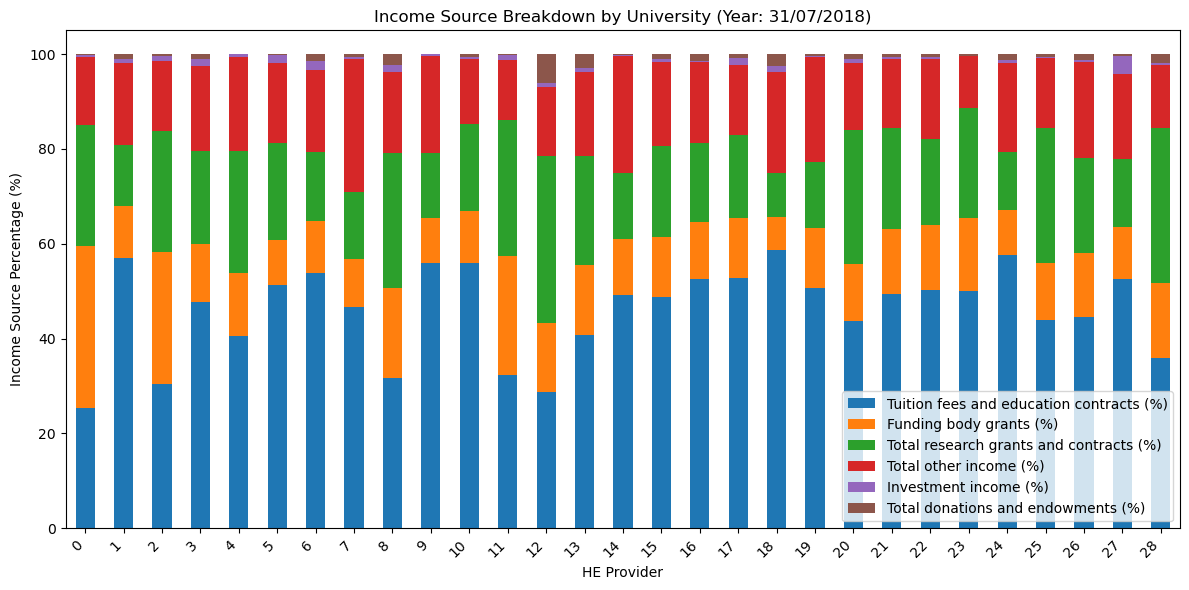

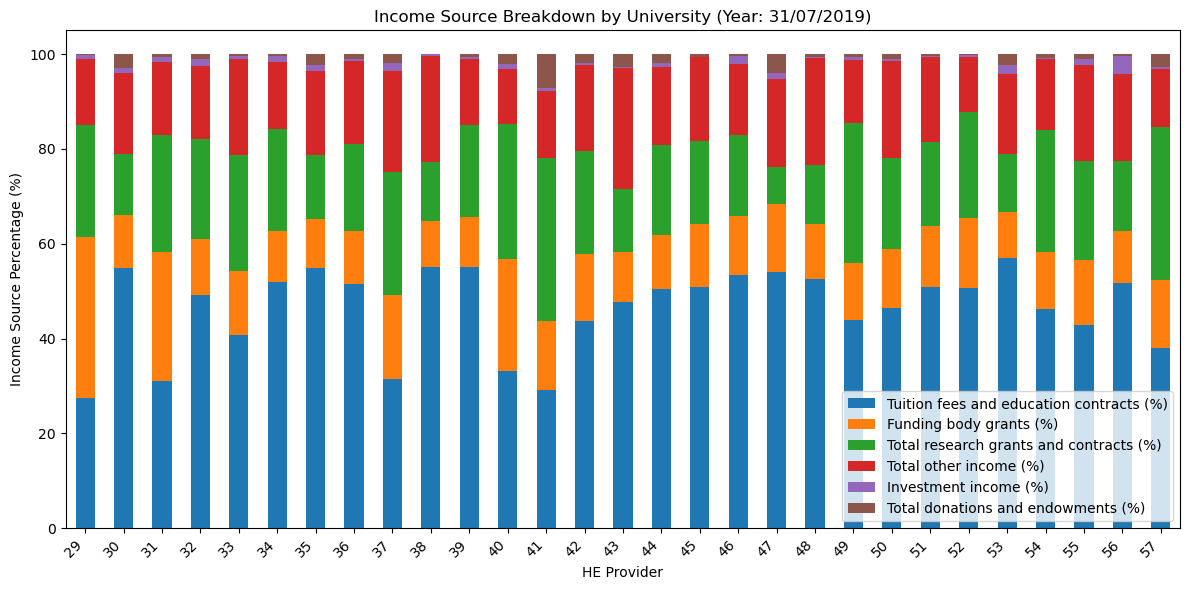

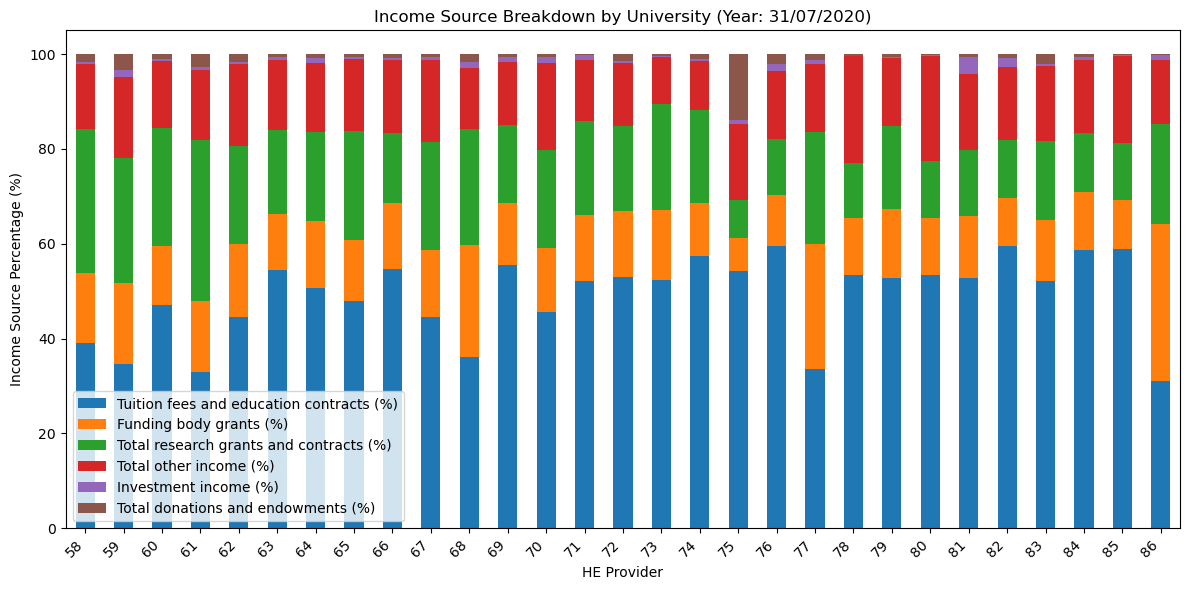

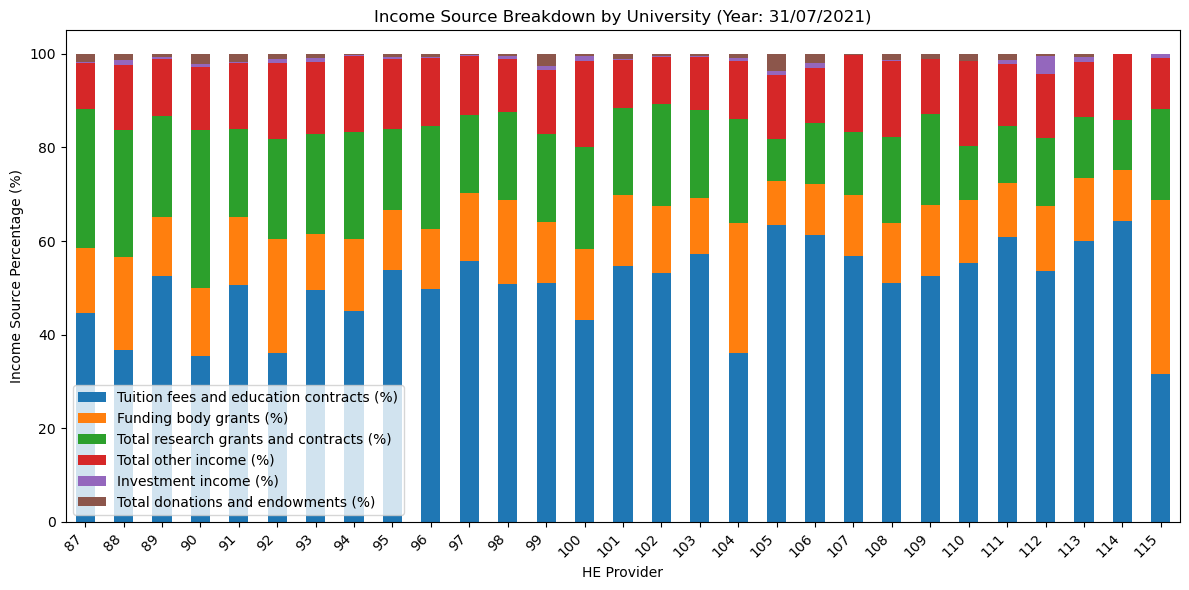

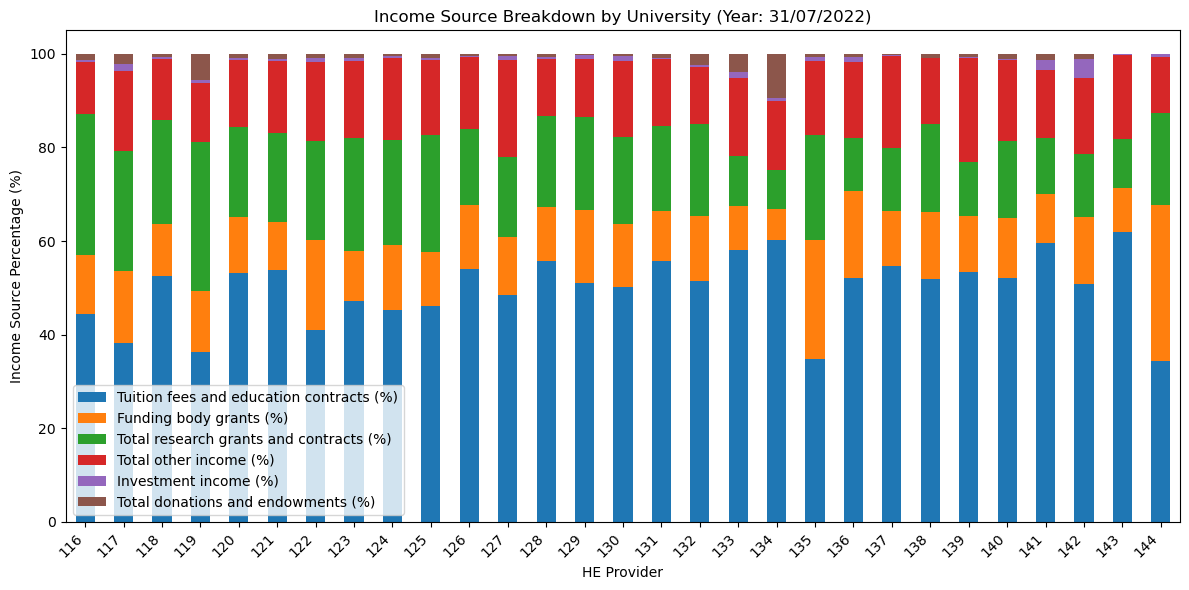

In [40]:
# First Prelim Visualisations: Stacked Bar Charts for Income Distribution accross the years for each University
years = sorted(percentages_df['Financial Year End'].unique())  # Get unique years

for year in years:
  year_df = percentages_df.loc[percentages_df['Financial Year End'] == year]  # Filter data by year
  year_df.plot(kind='bar', stacked=True, figsize=(12, 6)) # Stacked bar chart per university
  plt.xlabel('HE Provider')
  plt.ylabel('Income Source Percentage (%)')
  plt.title(f'Income Source Breakdown by University (Year: {year})')  # Include year in title
  plt.xticks(rotation=45, ha='right')
  plt.tight_layout()
  plt.show()

In [40]:
percentages_df.dtypes

Tuition fees and education contracts (%)    float64
Funding body grants (%)                     float64
Total research grants and contracts (%)     float64
Total other income (%)                      float64
Investment income (%)                       float64
Total donations and endowments (%)          float64
HE Provider                                  object
Financial Year End                           object
dtype: object

<Figure size 1500x800 with 0 Axes>

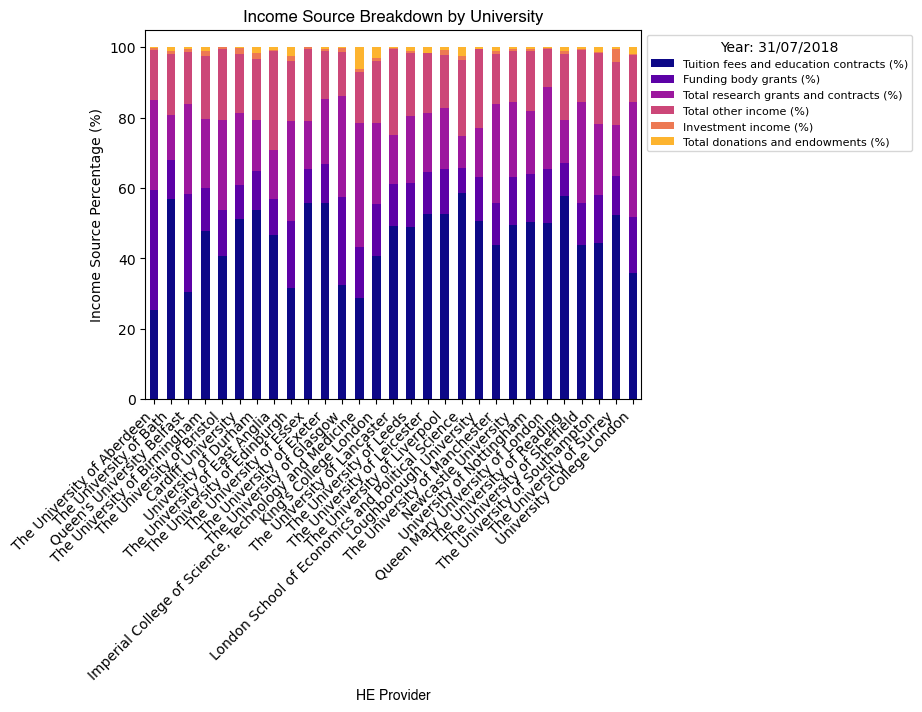

<Figure size 1500x800 with 0 Axes>

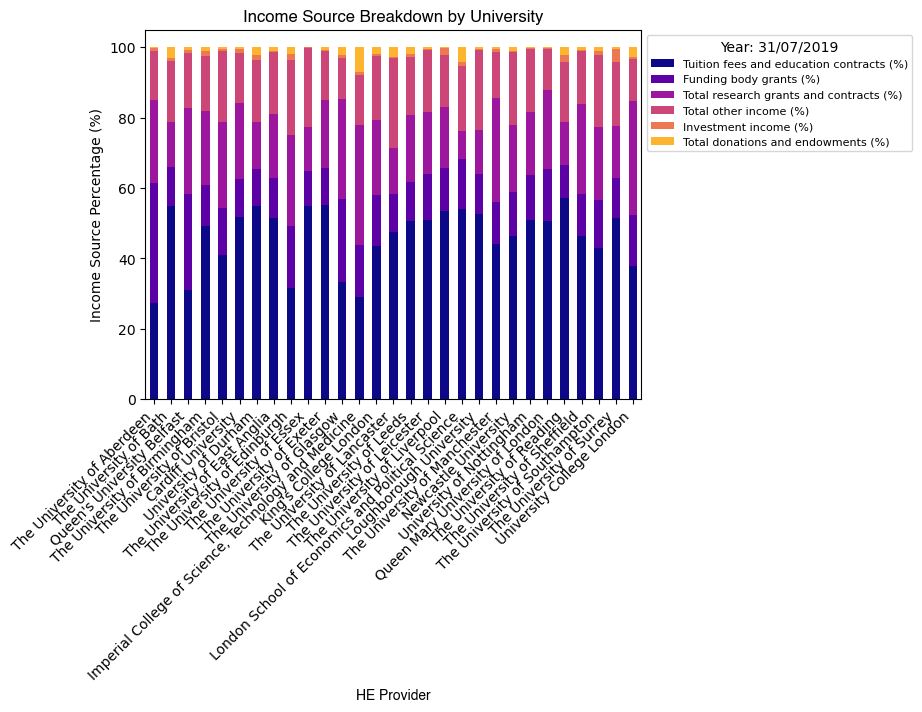

<Figure size 1500x800 with 0 Axes>

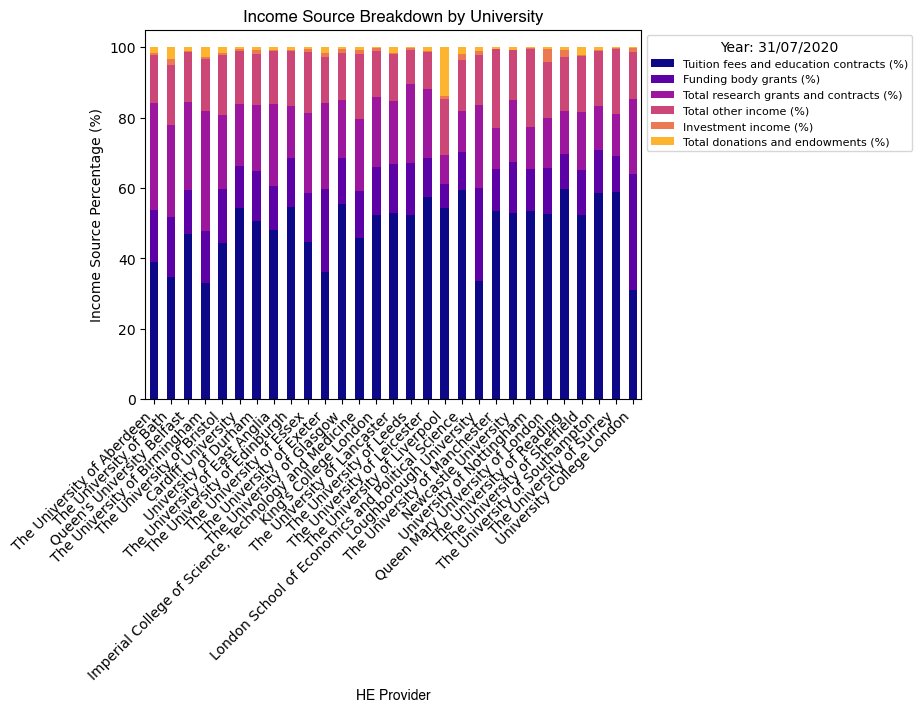

<Figure size 1500x800 with 0 Axes>

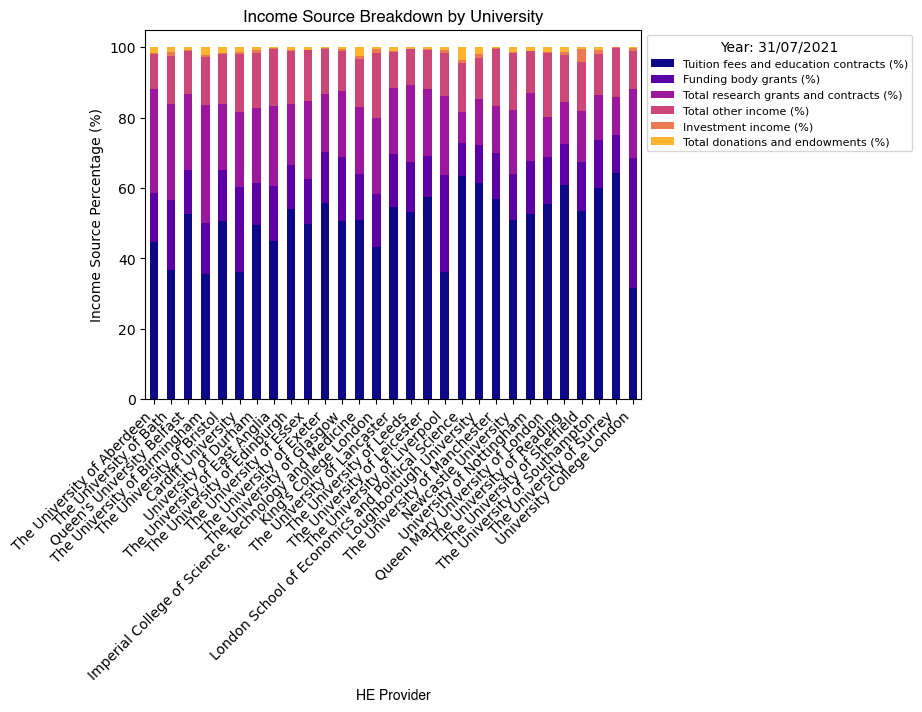

<Figure size 1500x800 with 0 Axes>

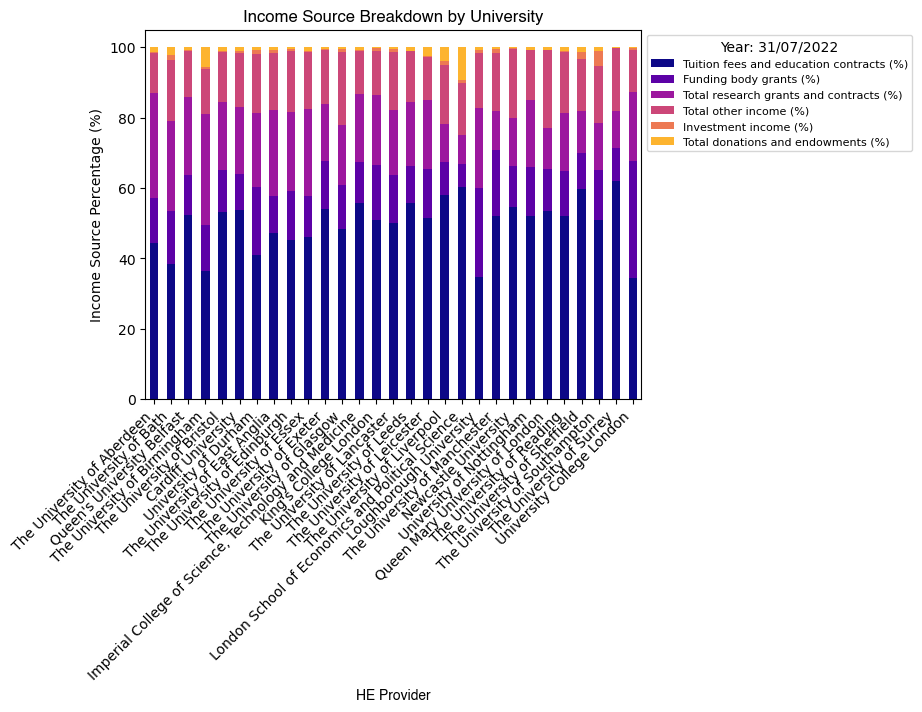

In [41]:
#Second Prelim Visualisation (Adding university names to x-axis, choosing another colour palette)

university_names = percentages_df['HE Provider'].unique()  # Get unique university names

cmap = cm.plasma # Or cm.Pastel1 for softer colours

# Assuming percentages_df has n income source columns
n_colors = len(percentages_df.columns) - 1  # Exclude the first column ('HE Provider')

# Generate pastel color list from the chosen colormap
pastel_colors = cmap(np.arange(n_colors) / (n_colors - 1))[:, :3]

years = sorted(percentages_df['Financial Year End'].unique())  # Get unique years

for year in years:
  year_df = percentages_df.loc[percentages_df['Financial Year End'] == year]  # Filter data by year

  plt.figure(figsize=(15, 8))  # Adjust figure size as needed

  # Plot the stacked bar chart with custom colors and university names on x-axis
  year_df.iloc[:, 0:].plot(kind='bar', stacked=True, color=pastel_colors)  # Exclude the first column ('HE Provider')
  hfont = {'fontname':'Helvetica'}
  plt.xlabel('HE Provider', fontsize=10,**hfont)  
  plt.ylabel('Income Source Percentage (%)', fontsize=10)

  # Set x-axis labels with rotation 
  plt.xticks(range(len(university_names)), university_names, rotation=45, ha='right')

  # Adjust legend and title font sizes 
  plt.legend(year_df.columns.drop('Financial Year End'), fontsize=8, title=f'Year: {year}', loc='upper left', bbox_to_anchor=(1, 1))  # Legend title and position

  plt.title('Income Source Breakdown by University', fontsize=12,**hfont)  # General title

  #plt.tight_layout()
  plt.show()

plt.close('all')  # Close all figure windows after the loop


In [43]:
# Sort out Filtered DataFrame (Original Values)
def sort_by_university_and_date2(filtered_df):
  return filtered_df.sort_values(by=['HE Provider', 'Financial Year End'], ascending=True)
# Sorted dataframe to use for visualisations in Tableau
sorted_filtered_df = sort_by_university_and_date2(filtered_df)

In [44]:
sorted_filtered_df.to_excel("sorted_filtered_data.xlsx", index=False) #Save as an Excel File

#### Descriptive Statistics

In [45]:
for cols in filtered_df.columns:
    print(cols)

UKPRN
HE Provider
Financial Year End
Tuition fees and education contracts
Funding body grants
Total research grants and contracts
Total other income
Investment income
Total income before donations and endowments
Total donations and endowments
Total income


In [46]:
print(income_source_cols)

['Tuition fees and education contracts', 'Funding body grants', 'Total research grants and contracts', 'Total other income', 'Investment income', 'Total donations and endowments']


In [47]:
# Get unique HE Providers (universities)
unique_universities = filtered_df['HE Provider'].unique()

# Loop through each university
for university in unique_universities:
  # Filter data for the current university
  university_data = filtered_df[filtered_df['HE Provider'] == university]
  
  # Descriptive statistics for income sources (excluding HE Provider and Year)
  descriptive_stats = university_data[income_source_cols].describe()
  
  # Print results for the current university
  print(f"Descriptive Statistics for {university}:\n", descriptive_stats)

Descriptive Statistics for The University of Aberdeen:
        Tuition fees and education contracts  Funding body grants  \
count                              5.000000             5.000000   
mean                           71075.000000         80830.200000   
std                            12964.884708          5969.498781   
min                            55842.000000         74752.000000   
25%                            62613.000000         77279.000000   
50%                            72574.000000         77618.000000   
75%                            74423.000000         86925.000000   
max                            89923.000000         87577.000000   

       Total research grants and contracts  Total other income  \
count                             5.000000            5.000000   
mean                          51265.600000        30323.200000   
std                            4014.550884         2555.661402   
min                           45927.000000        25764.000000   
2

### Income Trends in all 29 Universities for the span Financial Year End 2018-2022

<Figure size 1200x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

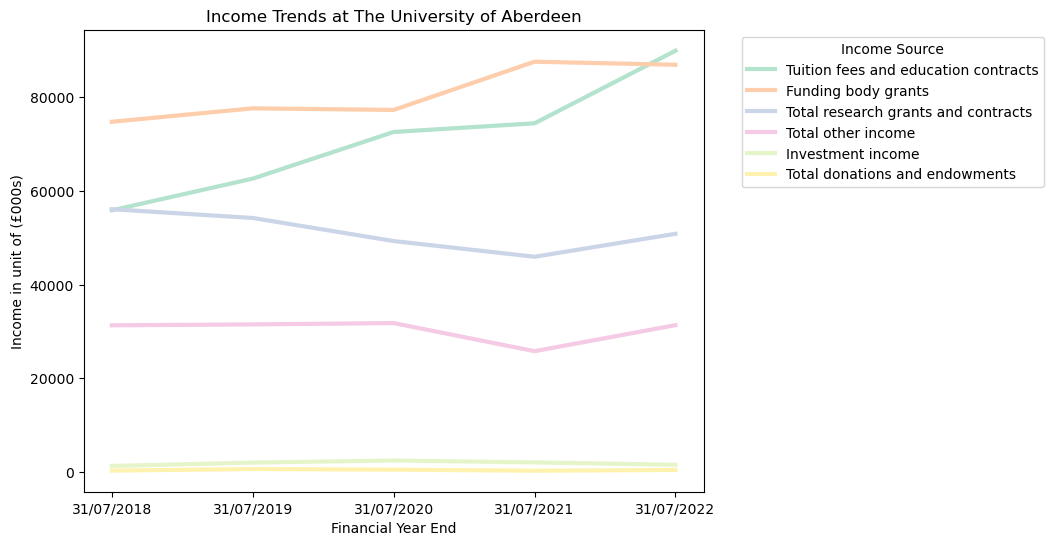

<Figure size 640x480 with 0 Axes>

<Figure size 800x600 with 0 Axes>

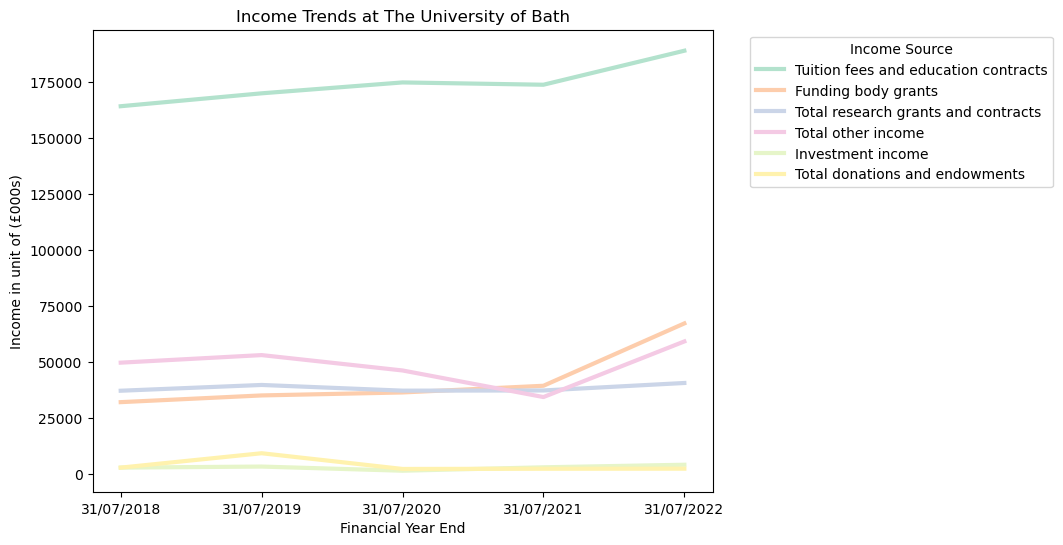

<Figure size 640x480 with 0 Axes>

<Figure size 800x600 with 0 Axes>

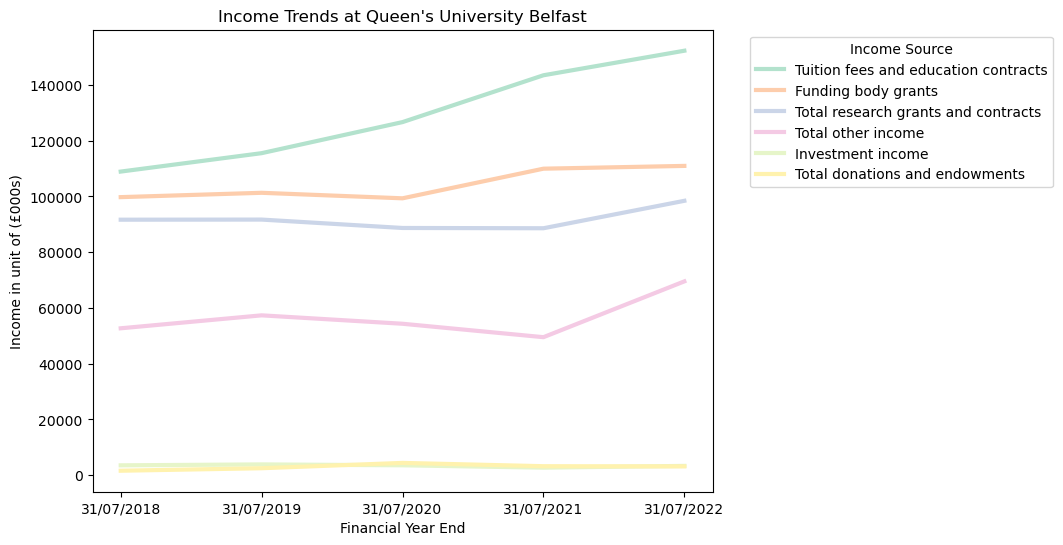

<Figure size 640x480 with 0 Axes>

<Figure size 800x600 with 0 Axes>

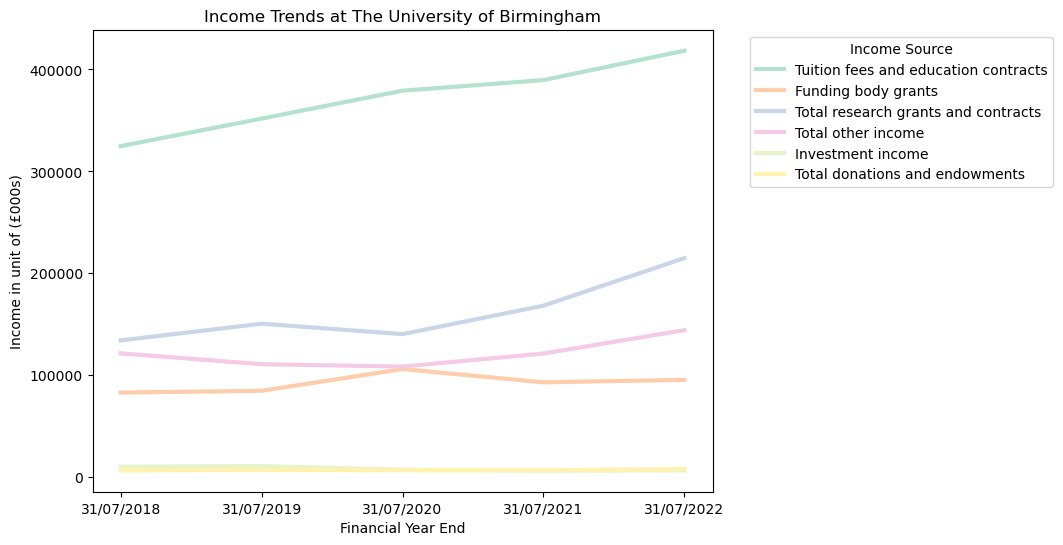

<Figure size 640x480 with 0 Axes>

<Figure size 800x600 with 0 Axes>

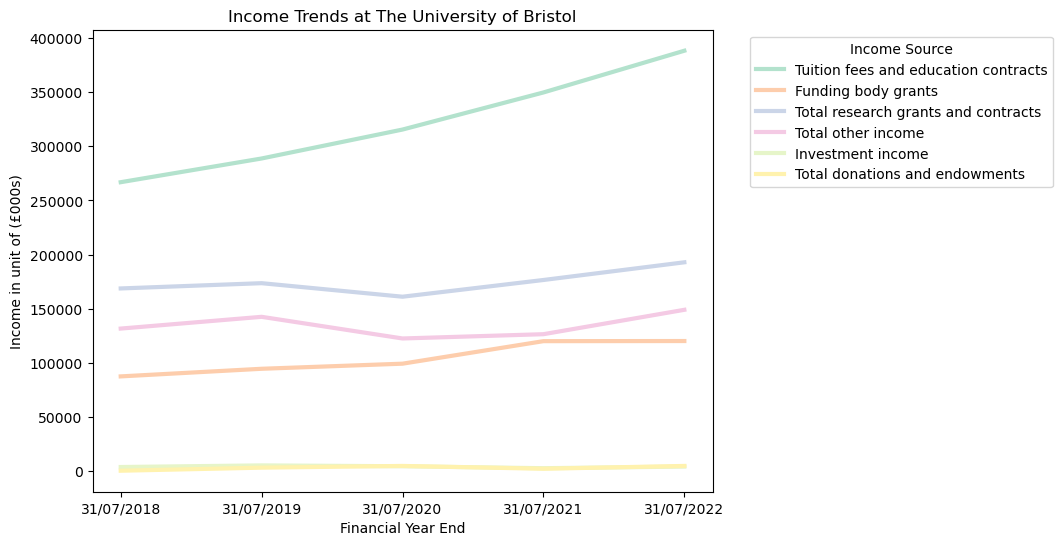

<Figure size 640x480 with 0 Axes>

<Figure size 800x600 with 0 Axes>

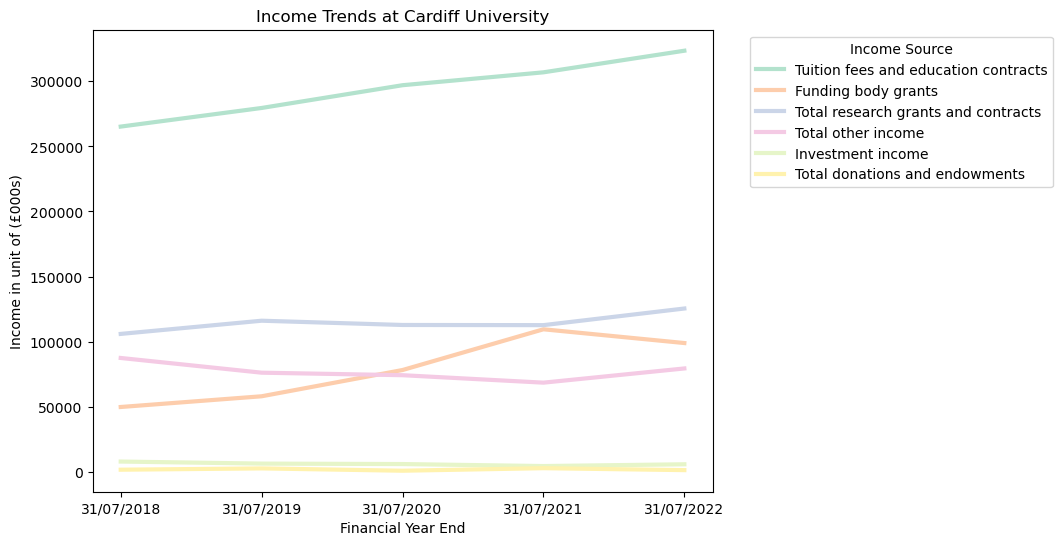

<Figure size 640x480 with 0 Axes>

<Figure size 800x600 with 0 Axes>

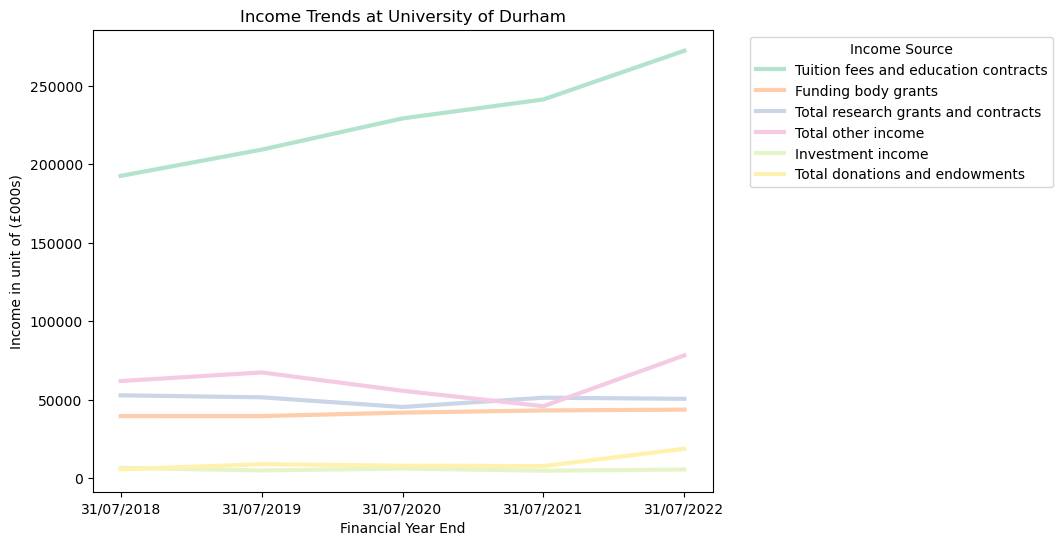

<Figure size 640x480 with 0 Axes>

<Figure size 800x600 with 0 Axes>

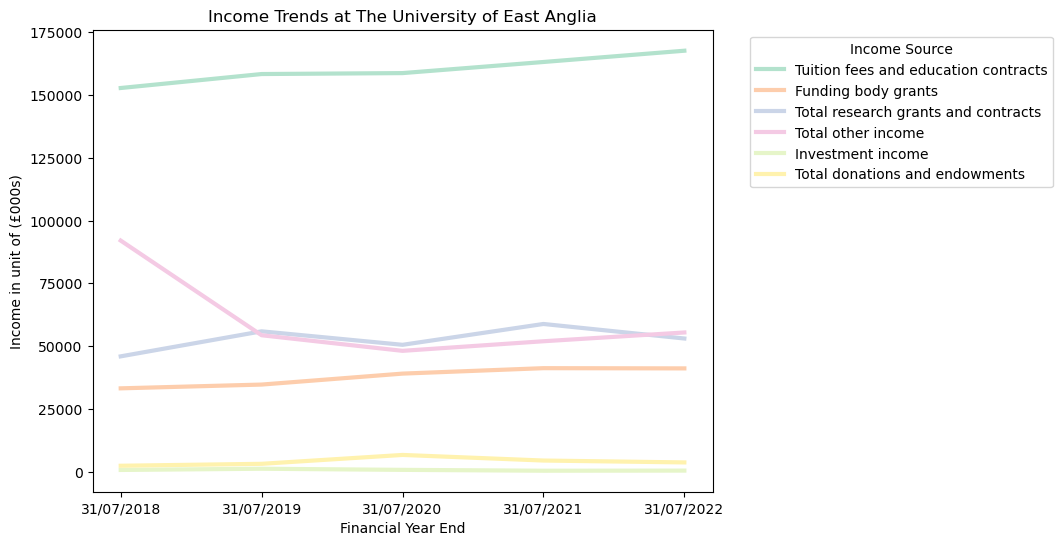

<Figure size 640x480 with 0 Axes>

<Figure size 800x600 with 0 Axes>

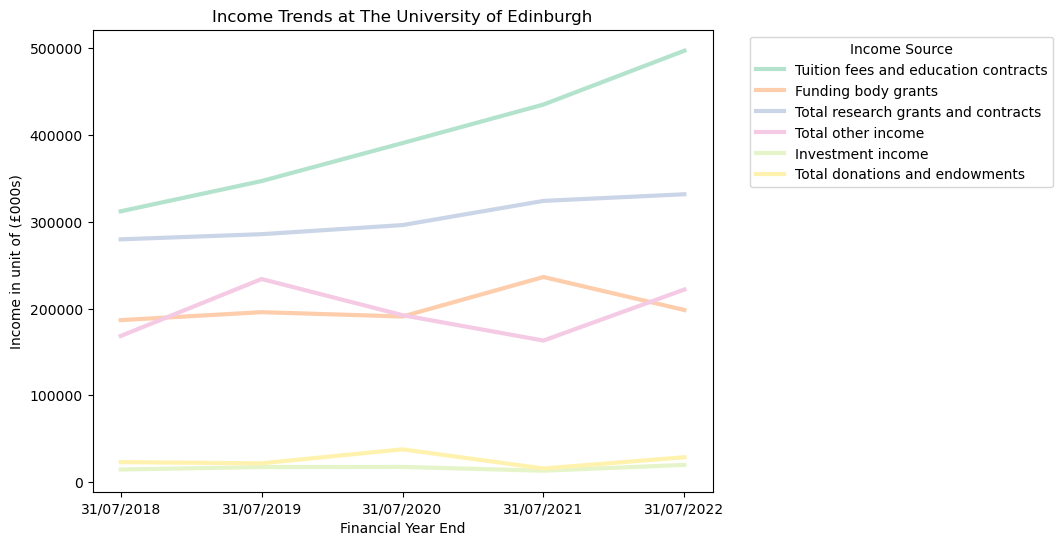

<Figure size 640x480 with 0 Axes>

<Figure size 800x600 with 0 Axes>

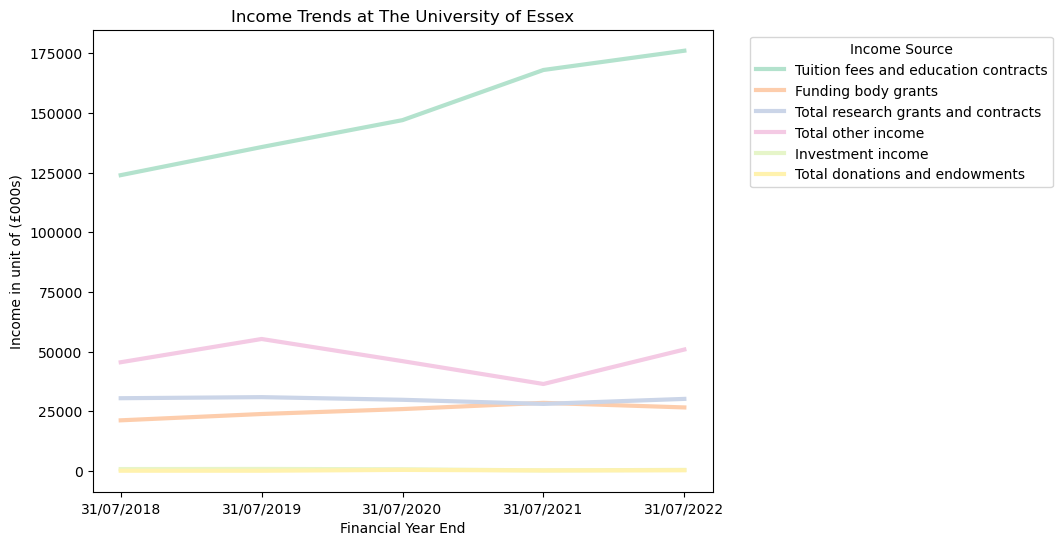

<Figure size 640x480 with 0 Axes>

<Figure size 800x600 with 0 Axes>

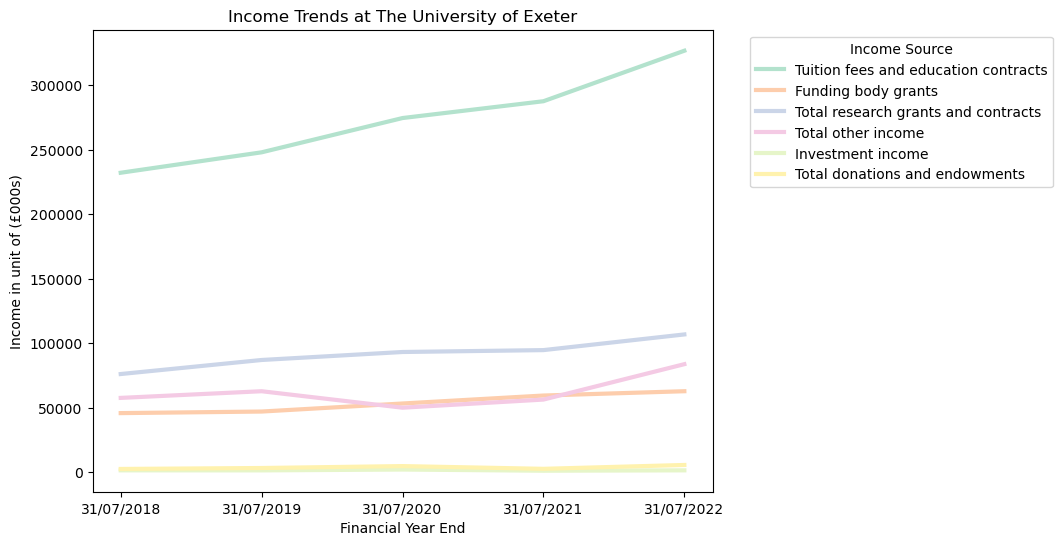

<Figure size 640x480 with 0 Axes>

<Figure size 800x600 with 0 Axes>

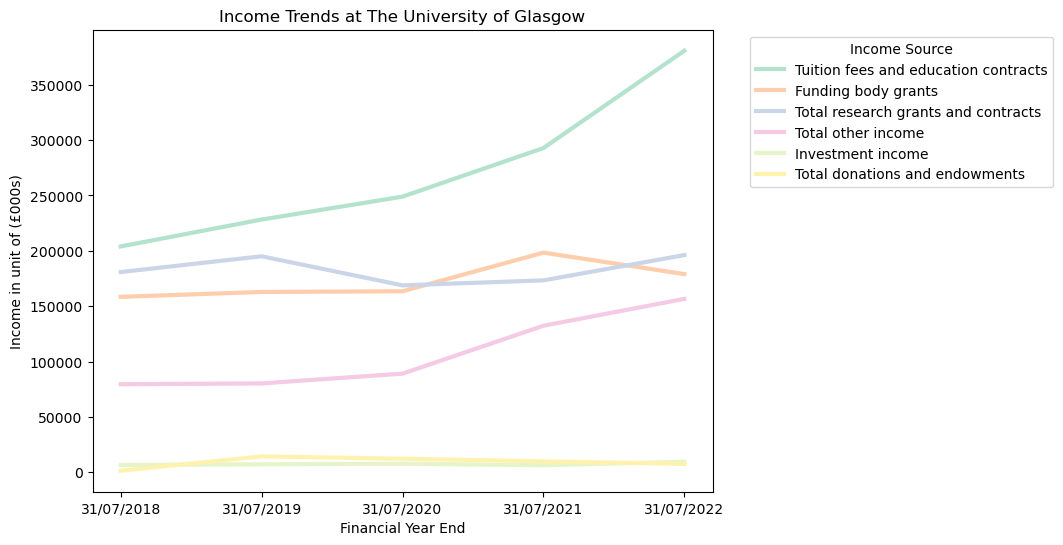

<Figure size 640x480 with 0 Axes>

<Figure size 800x600 with 0 Axes>

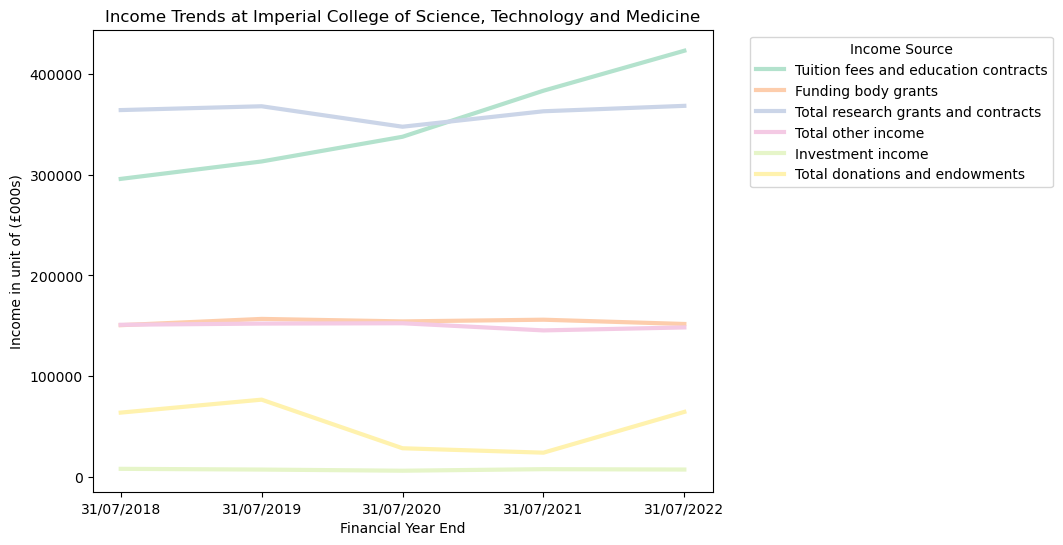

<Figure size 640x480 with 0 Axes>

<Figure size 800x600 with 0 Axes>

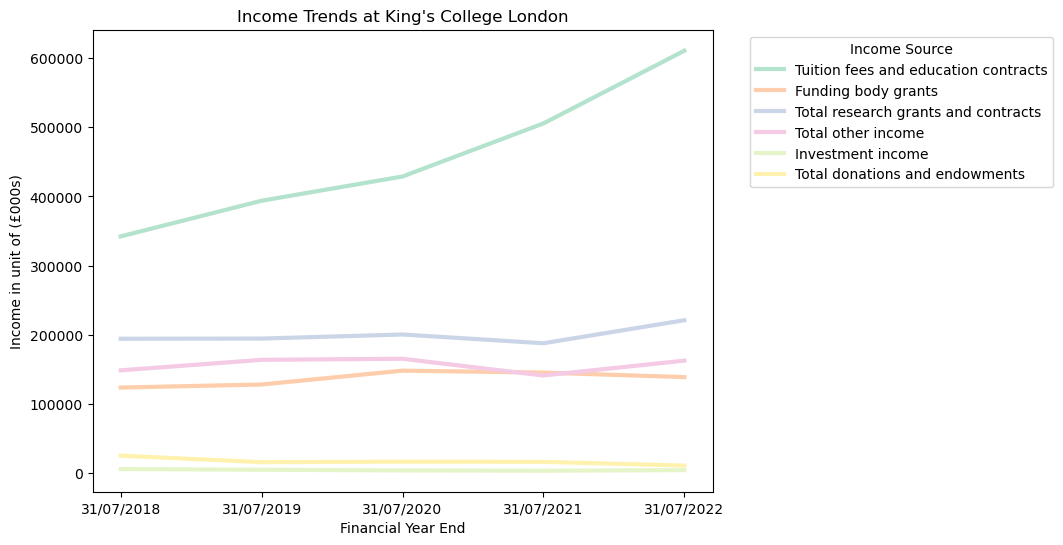

<Figure size 640x480 with 0 Axes>

<Figure size 800x600 with 0 Axes>

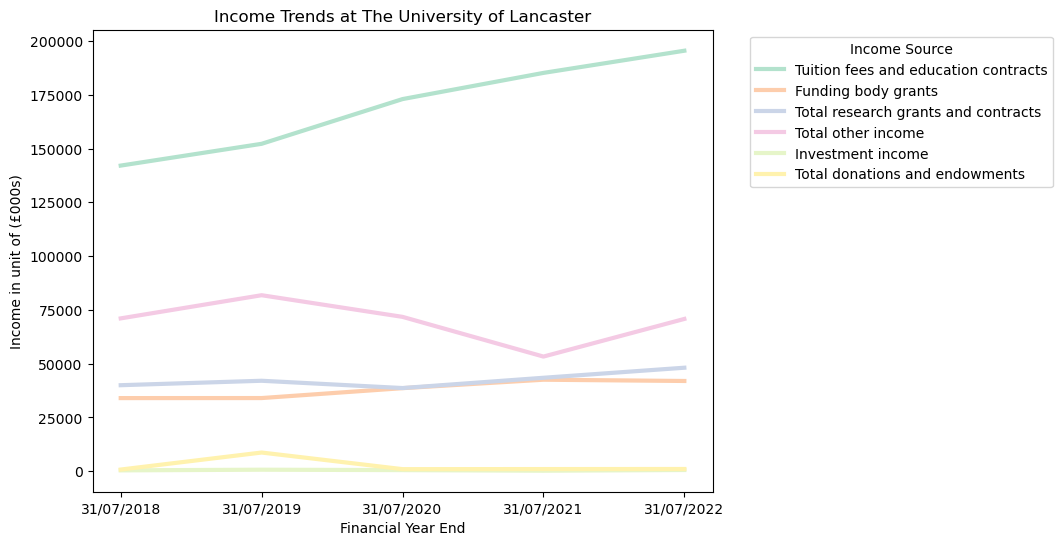

<Figure size 640x480 with 0 Axes>

<Figure size 800x600 with 0 Axes>

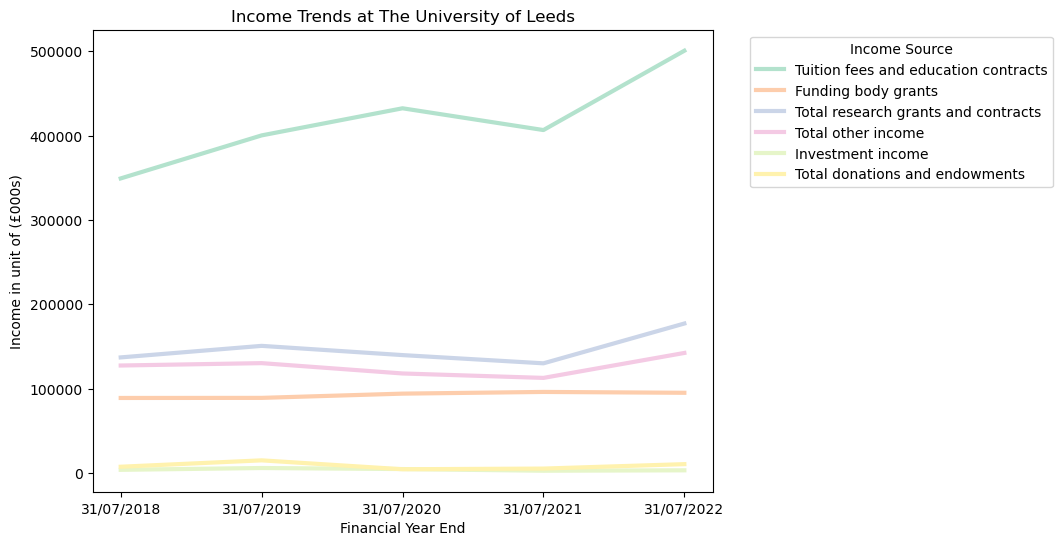

<Figure size 640x480 with 0 Axes>

<Figure size 800x600 with 0 Axes>

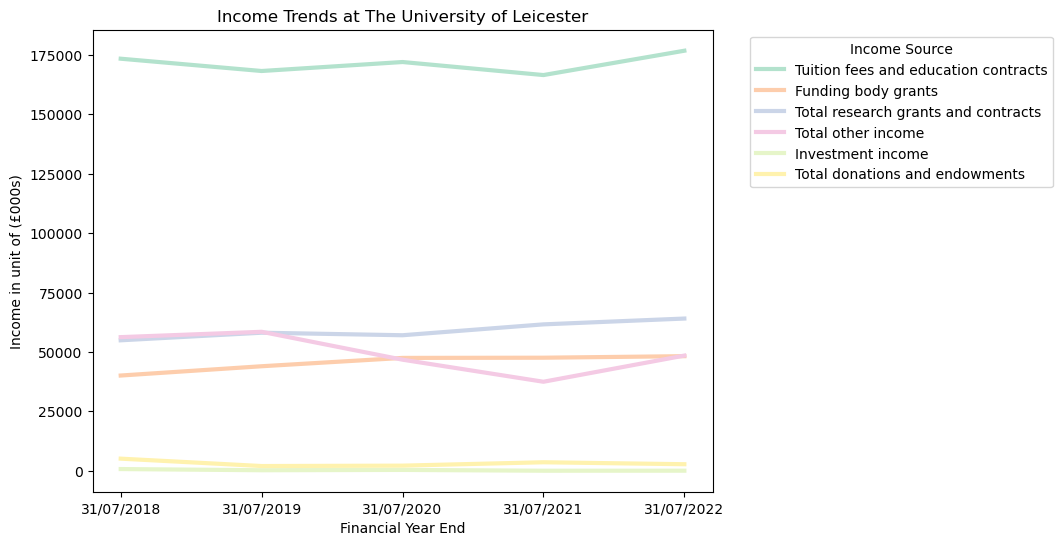

<Figure size 640x480 with 0 Axes>

<Figure size 800x600 with 0 Axes>

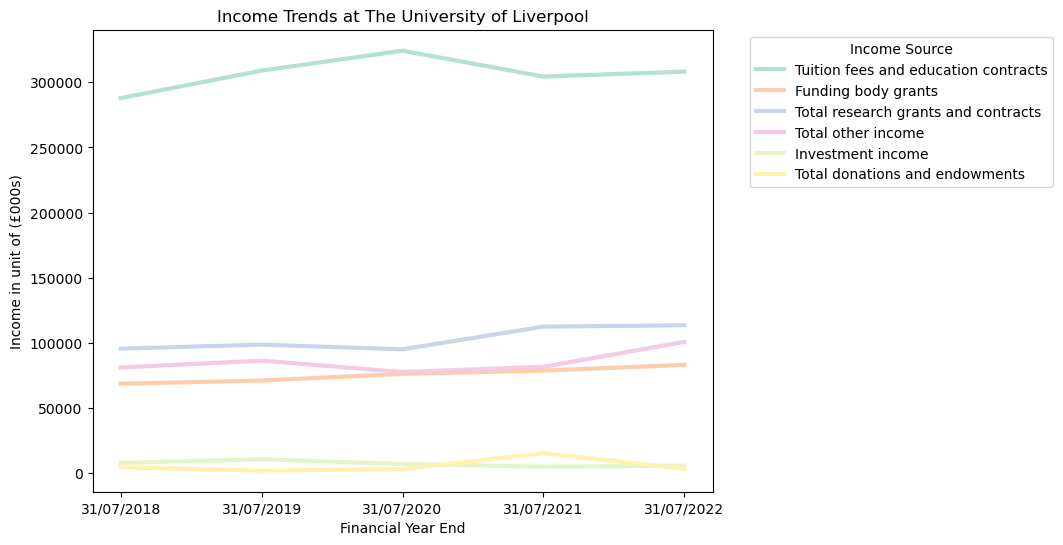

<Figure size 640x480 with 0 Axes>

<Figure size 800x600 with 0 Axes>

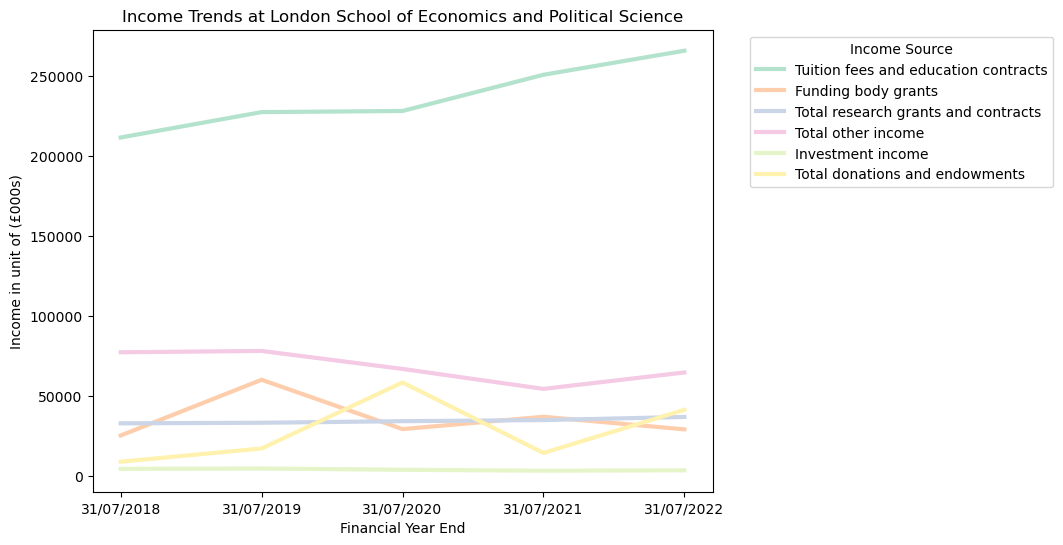

<Figure size 640x480 with 0 Axes>

<Figure size 800x600 with 0 Axes>

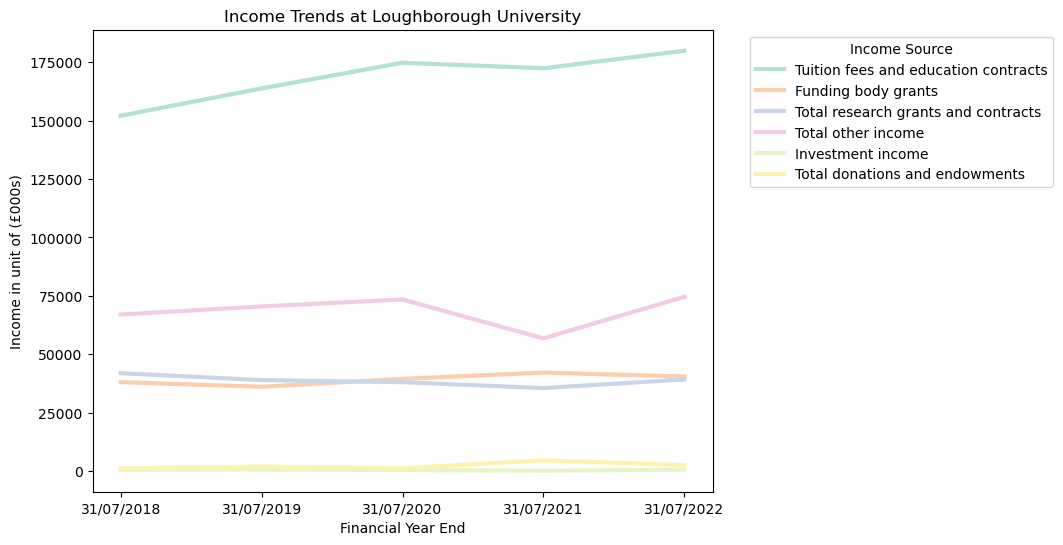

<Figure size 640x480 with 0 Axes>

<Figure size 800x600 with 0 Axes>

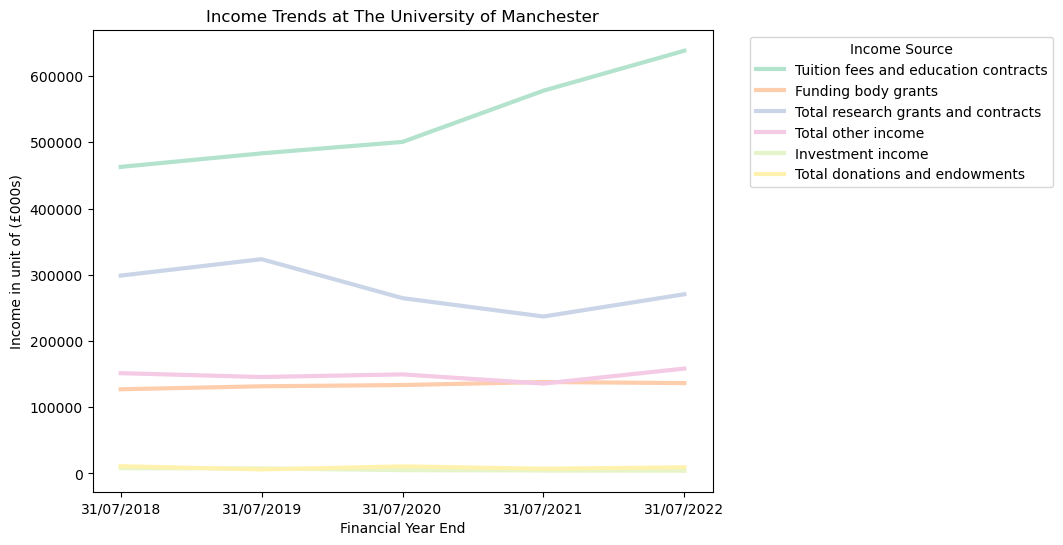

<Figure size 640x480 with 0 Axes>

<Figure size 800x600 with 0 Axes>

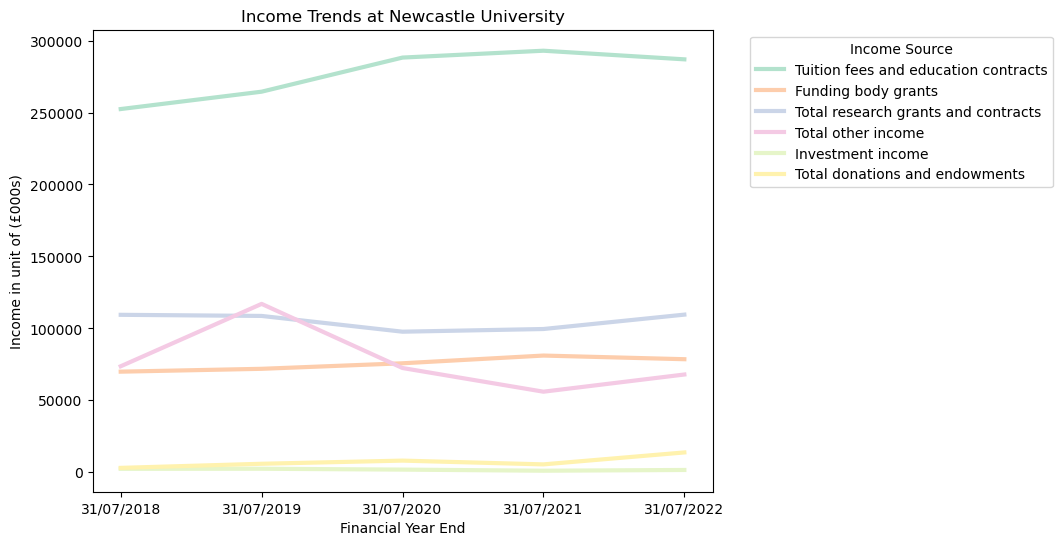

<Figure size 640x480 with 0 Axes>

<Figure size 800x600 with 0 Axes>

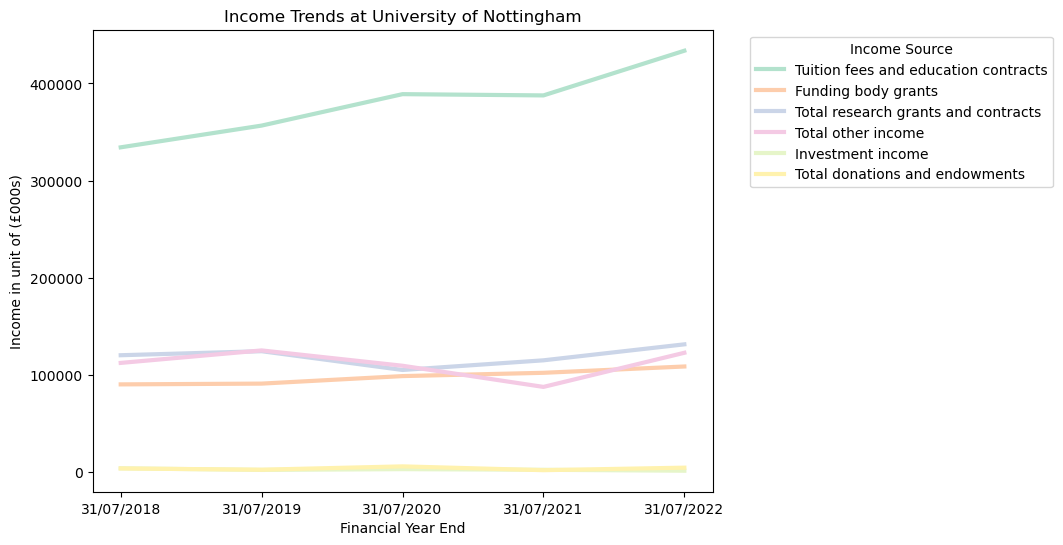

<Figure size 640x480 with 0 Axes>

<Figure size 800x600 with 0 Axes>

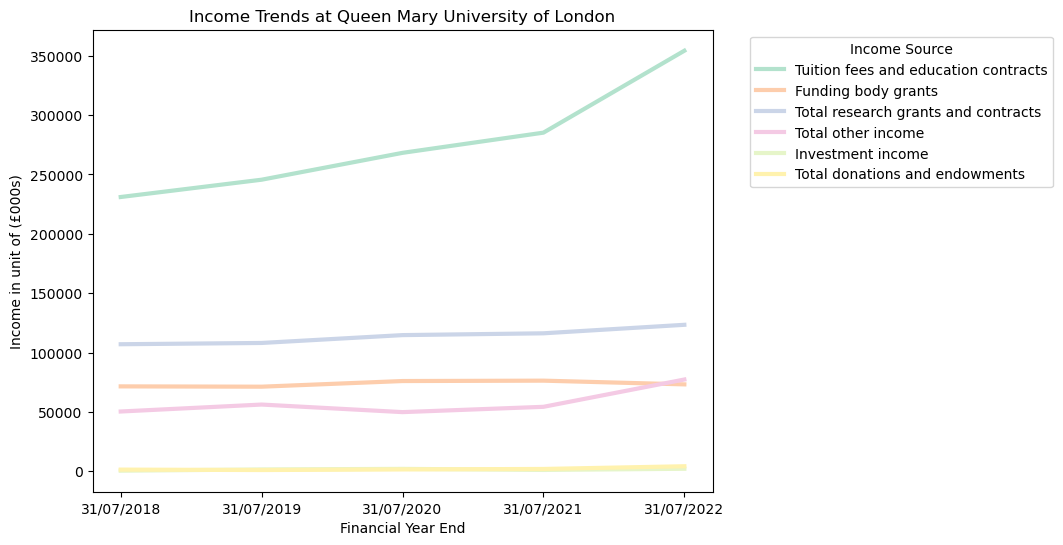

<Figure size 640x480 with 0 Axes>

<Figure size 800x600 with 0 Axes>

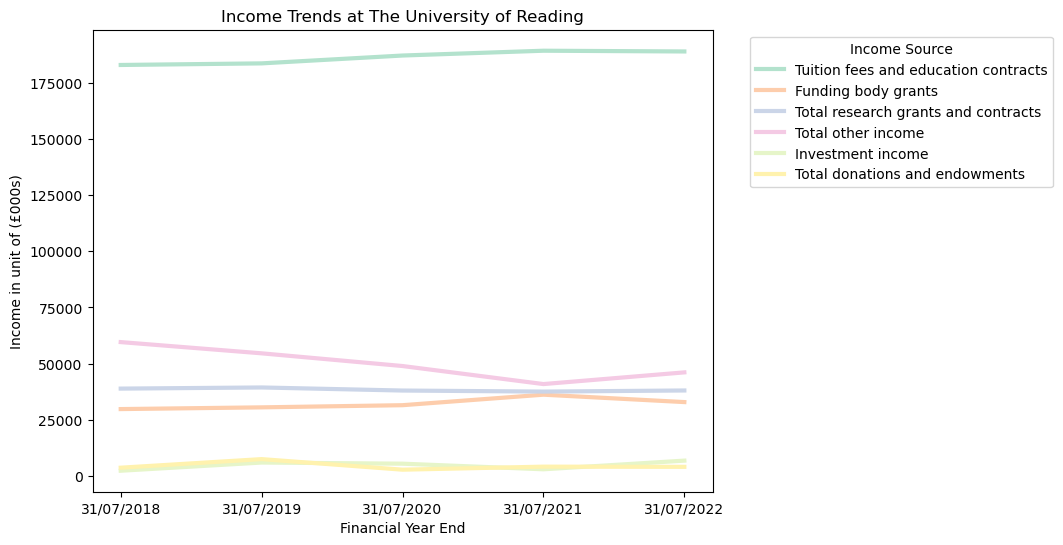

<Figure size 640x480 with 0 Axes>

<Figure size 800x600 with 0 Axes>

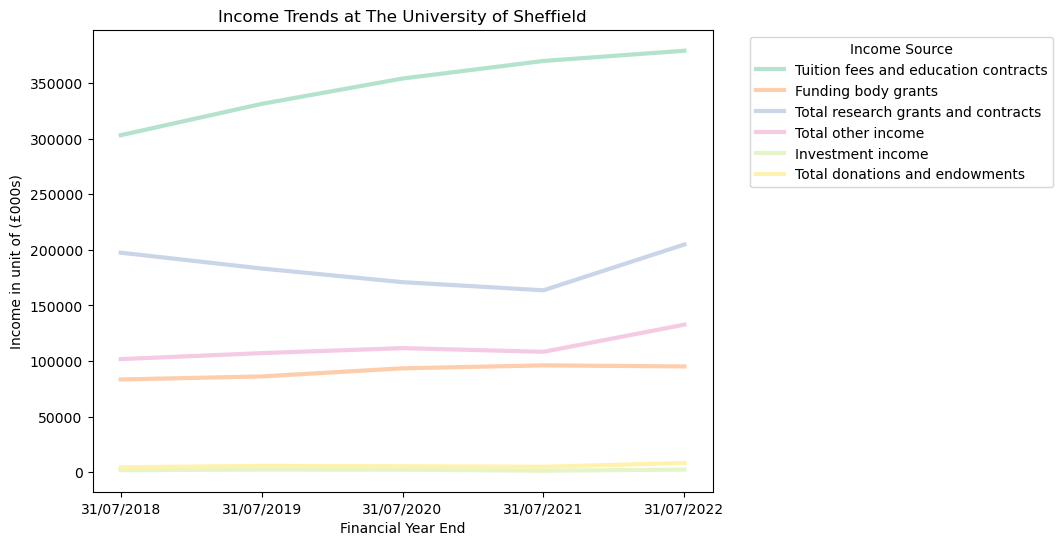

<Figure size 640x480 with 0 Axes>

<Figure size 800x600 with 0 Axes>

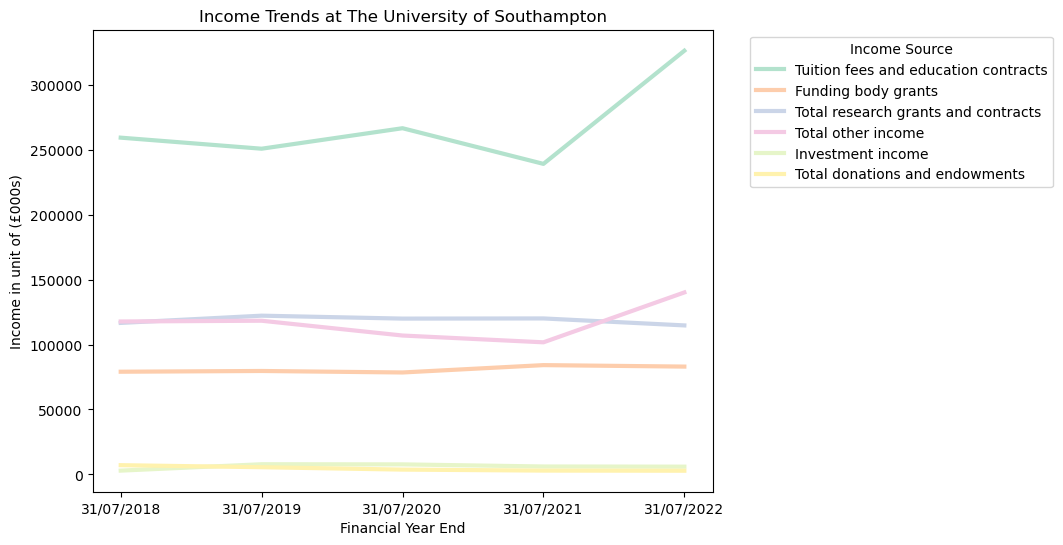

<Figure size 640x480 with 0 Axes>

<Figure size 800x600 with 0 Axes>

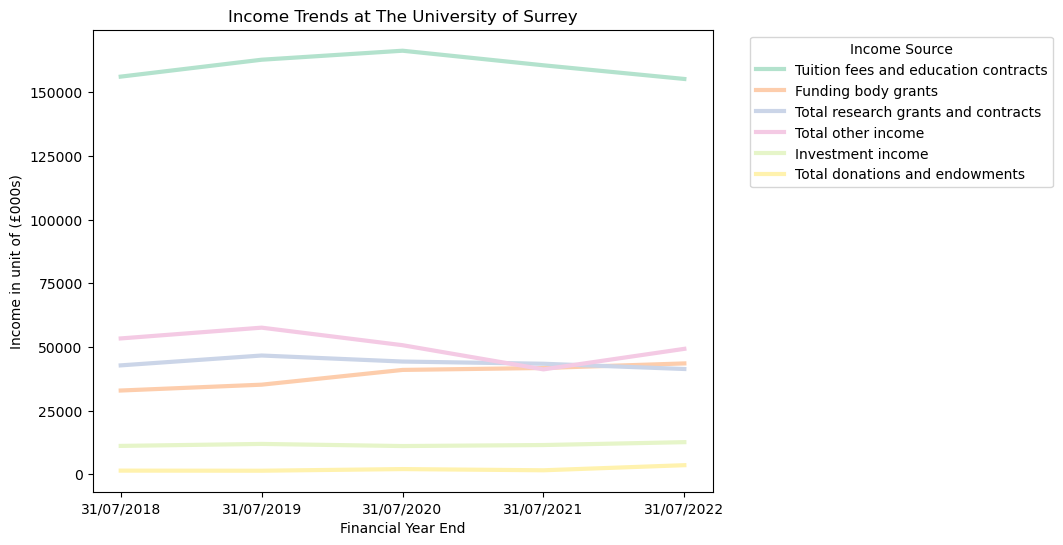

<Figure size 640x480 with 0 Axes>

<Figure size 800x600 with 0 Axes>

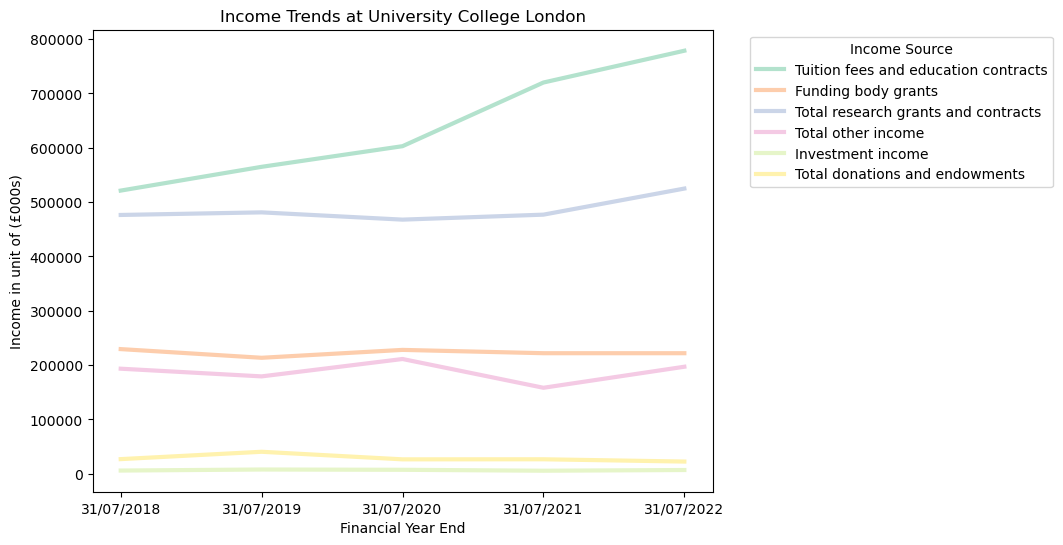

<Figure size 640x480 with 0 Axes>

In [43]:
# Line Graphs presenting income trends for each university 
cmap = cm.Pastel2  # Or cm.Pastel1

# Create a single plot
plt.figure(figsize=(12, 6))  # Figure size can be adjusted as needed

# Loop through each unique HE Provider (university)
for university in filtered_df['HE Provider'].unique():
  # Filter data for the current university
  university_data = filtered_df[filtered_df['HE Provider'] == university]

  # Group data by year (no averaging)
  income_values_per_year = university_data.groupby(['Financial Year End'])[income_source_cols]

  # Get the actual DataFrame result from the grouping
  income_data = income_values_per_year.apply(pd.DataFrame.reset_index)

  # Add 'Financial Year End' column to income_data if missing & clean its data type
  income_data['Financial Year End'] = income_data.index
  income_data['Financial Year End'] = income_data['Financial Year End'].astype(str) #Fixing Financial Year End dtype
  income_data['Financial Year End'] = income_data['Financial Year End'].str.split(',').str[0] #Removing , and 0 from Financal Year End
  income_data['Financial Year End'] = income_data['Financial Year End'].str.replace(r'\(|\)', '', regex=True)  # Clean unexpected characters
  income_data['Financial Year End'] = income_data['Financial Year End'].str.replace("'", "") # Remove ' from Financial Year End Column data
  plt.figure(figsize=(8, 6))  # Adjust figure size as needed

  # Unpack income source data lists for stackplot
  income_source_data = [list(income_data[col]) for col in income_source_cols]

  # Create a separate plot for each university
  plt.figure(figsize=(8, 6))  # Adjust figure size as needed

  # Loop through income source columns and plot lines
  for i, income_source in enumerate(income_source_cols):
    plt.plot(income_data['Financial Year End'], income_data[income_source], label=income_source, color=cmap(i % cmap.N), linewidth=3)

  # Customize plot elements
  plt.xlabel('Financial Year End')
  plt.ylabel('Income in unit of (£000s)')  # Adjust label based on income units, in this case £000s
  plt.title(f"Income Trends at {university}")
  plt.legend(title='Income Source',  bbox_to_anchor=(1.05, 1))  # Adjusted legend location (right)

  plt.show()  # Display plot

  # Clear plot for the next university (optional)
  plt.clf()  # Clear the current figure

### Correlation Analysis

In [49]:
# Create a new DataFrame with Income Percentages and total Income to be used for correlation analysis and as a dataset in Tableau
percentages_df2 = (filtered_df[income_source_cols].div(filtered_df['Total income'], axis=0) * 100)
percentages_df2.columns = [f"{col} (%)" for col in percentages_df2.columns]
percentages_df2['HE Provider'] = filtered_df['HE Provider'].copy()
percentages_df2['Financial Year End'] = filtered_df['Financial Year End'].copy()
percentages_df2['Total income']=filtered_df['Total income'].copy()

In [48]:
percentages_df2

,Tuition fees and education contracts (%),Funding body grants (%),Total research grants and contracts (%),Total other income (%),Investment income (%),Total donations and endowments (%),HE Provider,Financial Year End,Total income
0,25.443908,34.060081,25.551895,14.255186,0.570007,0.118922,The University of Aberdeen,31/07/2018,219471
1,56.915687,11.095918,12.863449,17.209570,0.957861,0.957514,The University of Bath,31/07/2018,288142
2,30.403661,27.845292,25.587037,14.714249,0.994704,0.455057,Queen's University Belfast,31/07/2018,358197
3,47.708872,12.200793,19.717538,17.851204,1.542597,0.978995,The University of Birmingham,31/07/2018,680800
4,40.564837,13.269834,25.631258,19.990484,0.532490,0.011097,The University of Bristol,31/07/2018,657853
...,...,...,...,...,...,...,...,...,...
140,52.152893,12.800689,16.502918,17.250520,0.139378,1.153602,The University of East Anglia,31/07/2022,321428
141,59.627845,10.377868,12.007309,14.551044,2.155231,1.280704,The University of Reading,31/07/2022,316857
142,50.827495,14.245429,13.528473,16.120844,4.119298,1.158460,The University of Surrey,31/07/2022,305319
143,61.928357,9.349548,10.607830,17.885679,0.140669,0.087918,The University of Essex,31/07/2022,284356


In [51]:
percentages_df2.to_excel("percentages_and_total.xlsx", index=False) #Save as an Excel File

In [53]:
correlation = percentages_df2[['Total income', 'Tuition fees and education contracts (%)']].corr().iloc[0, 1]
print(correlation)

-0.4022626567521883


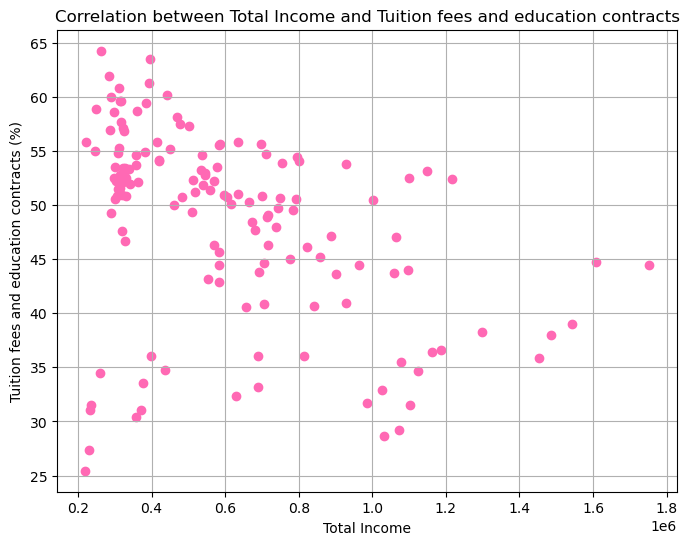

In [70]:
# Select the relevant columns
x = percentages_df2['Total income']
y = percentages_df2['Tuition fees and education contracts (%)']

# Create the scatter plot
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
plt.scatter(x, y,c='hotpink')

# Add labels and title
plt.xlabel('Total Income')
plt.ylabel('Tuition fees and education contracts (%)')
plt.title('Correlation between Total Income and Tuition fees and education contracts')

# Add a grid (optional)
plt.grid(True)

# Show the plot
plt.show()

-0.4 Indicates a Weak Negative Correlation.

As the total income of universities increases, there's a slight tendency for the percentage contribution of tuition fees to decrease. In other words, universities with higher total income tend to rely slightly less on tuition fees as a proportion of their income.

In [64]:
correlation2 = percentages_df2[['Total income', 'Total research grants and contracts (%)']].corr().iloc[0, 1]
print(correlation2)

0.7203220955984588


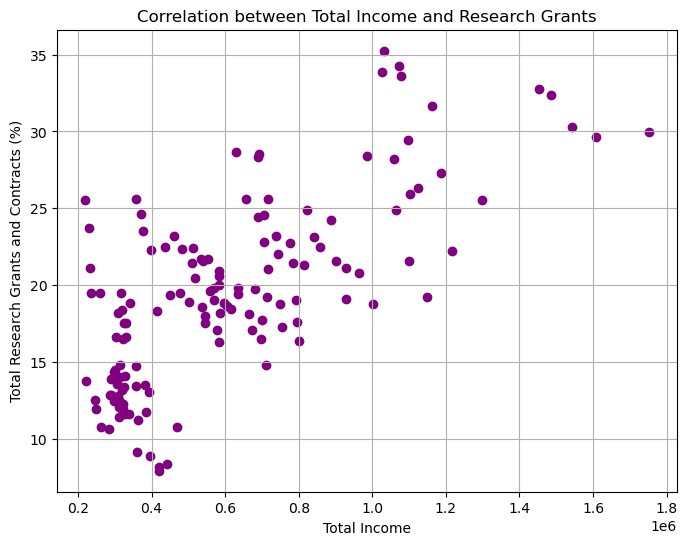

In [65]:
# Select the relevant columns
x = percentages_df2['Total income']
y = percentages_df2['Total research grants and contracts (%)']

# Create the scatter plot
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
plt.scatter(x, y, c='purple')

# Add labels and title
plt.xlabel('Total Income')
plt.ylabel('Total Research Grants and Contracts (%)')
plt.title('Correlation between Total Income and Research Grants')

# Add a grid (optional)
plt.grid(True)

# Show the plot
plt.show()

0.7 Indicates a moderate positive correlation. 

As the total income of universities increases, there's a clear tendency for the percentage contribution of research grants and contracts to also increase.

In [66]:
correlation3 = percentages_df2[['Total income', 'Funding body grants (%)']].corr().iloc[0, 1]
print(correlation3)

-0.04059041733341554


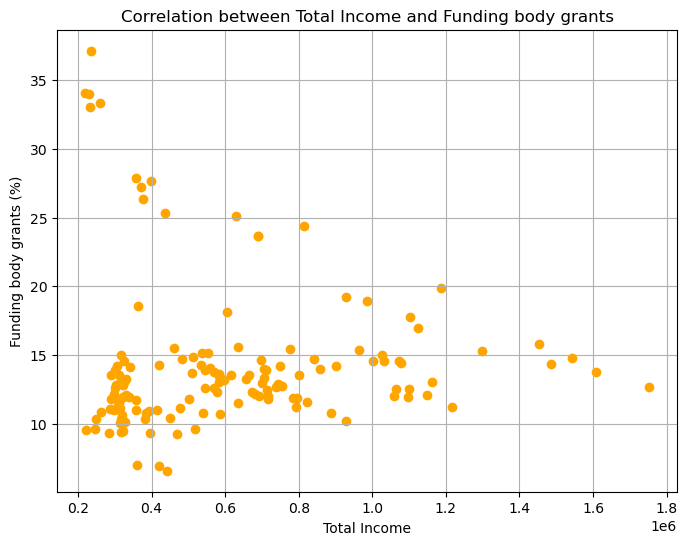

In [75]:
# Select the relevant columns
x = percentages_df2['Total income']
y = percentages_df2['Funding body grants (%)']

# Create the scatter plot
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
plt.scatter(x, y, c='orange')

# Add labels and title
plt.xlabel('Total Income')
plt.ylabel('Funding body grants (%)')
plt.title('Correlation between Total Income and Funding body grants')

# Add a grid (optional)
plt.grid(True)

# Show the plot
plt.show()



a correlation of -0.4 suggests a tendency for universities with higher total income to have a lower percentage of funding from grant bodies, and vice versa. However, the relationship is weak, meaning it's not a perfect inverse relationship and there can be exceptions. 